# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
data = pd.read_csv('real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
data.duplicated().sum()

np.int64(0)

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'rooms'}>],
       [<Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>,
        <Axes: title={'center': 'floor'}>],
       [<Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>,
        <Axes: title={'center': 'cityCenters_nearest'}>],
       [<Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>,
        <Axes: title={'center': 'ponds_nearest'}>],
       [<Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

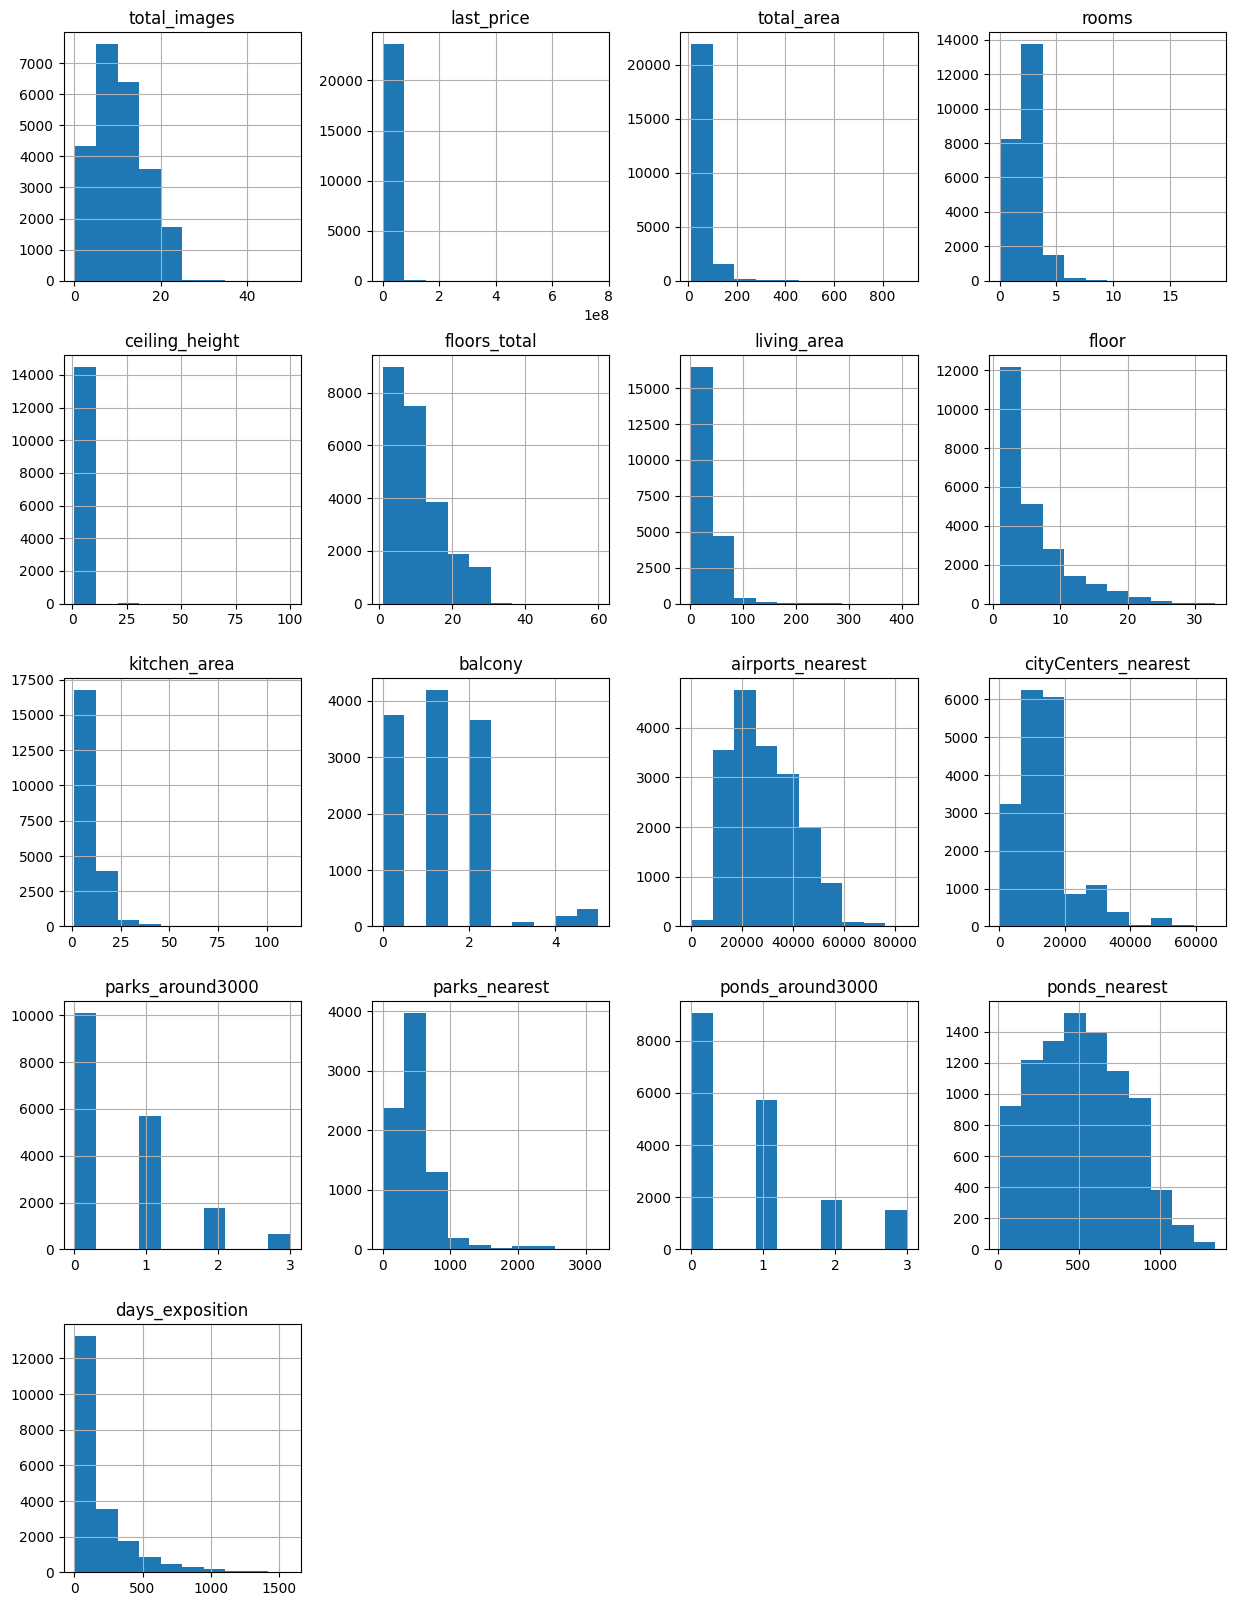

In [5]:
data.hist(figsize=(15, 20))

### Выполните предобработку данных

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
data.sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,...,40.5,NaN,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,NaN,2.0,16.0,1,NaN,...,6.0,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,NaN,3.0,NaN,3,NaN,...,NaN,NaN,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,NaN,5.0,NaN,1,NaN,...,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17676,0,450000.0,36.5,2018-02-01T00:00:00,1,NaN,5.0,17.3,4,NaN,...,8.5,1.0,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.50,7.0,95.0,5,NaN,...,40.0,NaN,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
14706,15,401300000.0,401.0,2016-02-20T00:00:00,5,NaN,9.0,204.0,9,False,...,24.0,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
19540,8,420000000.0,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0


In [8]:
data = data[data['last_price'] != data['last_price'].min()]
data = data[data['last_price'] != data['last_price'].max()]

In [9]:
data.sort_values(by='last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17456,7,430000.0,30.4,2019-04-22T00:00:00,1,NaN,2.0,16.0,1,NaN,...,6.0,NaN,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14911,5,430000.0,54.0,2018-06-26T00:00:00,2,NaN,3.0,NaN,3,NaN,...,NaN,NaN,посёлок станции Свирь,NaN,NaN,NaN,NaN,NaN,NaN,44.0
16274,18,440000.0,40.0,2018-07-10T00:00:00,1,NaN,5.0,NaN,1,NaN,...,NaN,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17676,0,450000.0,36.5,2018-02-01T00:00:00,1,NaN,5.0,17.3,4,NaN,...,8.5,1.0,деревня Ям-Тесово,NaN,NaN,NaN,NaN,NaN,NaN,120.0
9581,7,450000.0,43.4,2018-08-31T00:00:00,2,NaN,5.0,30.3,3,NaN,...,5.5,NaN,деревня Старополье,NaN,NaN,NaN,NaN,NaN,NaN,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22831,18,289238400.0,187.5,2019-03-19T00:00:00,2,3.37,6.0,63.7,6,NaN,...,30.2,NaN,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,NaN
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
1436,19,330000000.0,190.0,2018-04-04T00:00:00,3,3.50,7.0,95.0,5,NaN,...,40.0,NaN,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
14706,15,401300000.0,401.0,2016-02-20T00:00:00,5,NaN,9.0,204.0,9,False,...,24.0,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0


<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
В ходе анализа данных по значению цены за квартиру, я обнаружила аномальные значения и исключила их из дальнейшей обработки данных.
<hr height="2px" color="#800080">
</div>

In [10]:
data.sort_values(by='total_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19904,4,2400000.0,12.0,2017-07-19T00:00:00,1,2.55,5.0,10.0,2,NaN,...,NaN,NaN,Санкт-Петербург,21314.0,964.0,1.0,886.0,2.0,45.0,200.0
17961,3,1400000.0,13.0,2017-12-03T00:00:00,1,2.60,9.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,14350.0,15945.0,0.0,NaN,1.0,185.0,410.0
19807,0,3800000.0,13.0,2018-07-04T00:00:00,1,NaN,5.0,10.0,3,NaN,...,NaN,NaN,Санкт-Петербург,21302.0,1242.0,1.0,592.0,3.0,27.0,9.0
19546,3,1850000.0,13.0,2019-03-11T00:00:00,1,3.40,5.0,NaN,2,False,...,NaN,NaN,Санкт-Петербург,24915.0,5483.0,1.0,644.0,0.0,NaN,24.0
19558,2,1686000.0,13.2,2018-12-17T00:00:00,1,NaN,5.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,19891.0,4165.0,1.0,361.0,1.0,155.0,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5358,20,65000000.0,590.0,2019-02-14T00:00:00,15,3.50,6.0,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
15651,20,300000000.0,618.0,2017-12-18T00:00:00,7,3.40,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
3117,19,140000000.0,631.0,2019-03-30T00:00:00,7,NaN,5.0,NaN,5,NaN,...,60.0,NaN,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
12859,20,140000000.0,631.2,2019-04-09T00:00:00,7,3.90,4.0,322.3,4,NaN,...,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN


<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
    Проанализировав площади квартир, я пришла к выводу о том, что аномальных и пропущенных значений нет.
<hr height="2px" color="#800080">
</div>

In [11]:
data.sort_values(by='first_day_exposition')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
10132,2,16137000.0,154.76,2014-11-27T00:00:00,4,2.70,20.0,67.81,20,NaN,...,32.55,0.0,Санкт-Петербург,18490.0,17492.0,0.0,NaN,2.0,113.0,573.0
8393,10,8037000.0,56.20,2014-11-27T00:00:00,1,NaN,5.0,24.20,5,False,...,12.90,0.0,Санкт-Петербург,36813.0,8572.0,1.0,2467.0,3.0,214.0,972.0
15857,6,25000000.0,145.20,2014-11-27T00:00:00,3,NaN,5.0,60.70,5,NaN,...,40.20,NaN,Санкт-Петербург,36779.0,14931.0,0.0,NaN,0.0,NaN,NaN
2831,9,5990000.0,64.40,2014-11-27T00:00:00,2,3.12,4.0,36.20,1,NaN,...,14.60,0.0,Санкт-Петербург,24668.0,5236.0,1.0,366.0,0.0,NaN,1069.0
696,1,3364930.0,34.69,2014-11-27T00:00:00,1,2.64,25.0,23.43,25,NaN,...,23.43,2.0,Санкт-Петербург,43396.0,12153.0,0.0,NaN,0.0,NaN,574.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0,5600000.0,61.60,2019-05-03T00:00:00,3,2.50,9.0,42.00,5,NaN,...,8.30,NaN,Санкт-Петербург,36326.0,10641.0,1.0,637.0,0.0,NaN,NaN
4450,13,3500000.0,34.60,2019-05-03T00:00:00,1,2.50,5.0,19.40,3,NaN,...,7.30,2.0,Пушкин,13107.0,25261.0,1.0,361.0,0.0,NaN,NaN
13746,10,7790000.0,42.30,2019-05-03T00:00:00,1,NaN,17.0,18.80,9,NaN,...,11.70,2.0,Санкт-Петербург,39065.0,12241.0,1.0,192.0,0.0,NaN,NaN
14246,14,6200000.0,86.20,2019-05-03T00:00:00,3,NaN,10.0,49.50,7,NaN,...,17.00,NaN,деревня Куттузи,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
    Сделала форматирование даты и времени в более читабельный вид, отбросив часы.
<hr height="2px" color="#800080">
</div>

In [13]:
data.sort_values(by='rooms')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1277,10,3150000.0,26.00,2017-07-14,0,2.75,21.0,17.38,11,NaN,...,NaN,NaN,Санкт-Петербург,48847.0,16685.0,0.0,NaN,0.0,NaN,622.0
3435,7,2800000.0,29.00,2017-12-10,0,2.55,10.0,20.00,7,NaN,...,NaN,NaN,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,115.0
2270,19,3550000.0,27.55,2017-12-06,0,2.75,18.0,18.00,12,NaN,...,NaN,2.0,Санкт-Петербург,34201.0,14069.0,0.0,NaN,0.0,NaN,226.0
7286,6,2580000.0,30.00,2018-02-07,0,NaN,18.0,19.00,2,NaN,...,NaN,NaN,посёлок Парголово,52610.0,18787.0,0.0,NaN,0.0,NaN,41.0
18185,6,2300000.0,25.00,2018-09-11,0,NaN,17.0,15.00,2,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866,5,25000000.0,363.00,2017-12-23,14,3.16,5.0,222.00,4,NaN,...,16.6,NaN,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
20829,6,28659000.0,245.40,2016-03-31,14,NaN,4.0,168.30,2,NaN,...,25.9,0.0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0
5358,20,65000000.0,590.00,2019-02-14,15,3.50,6.0,409.00,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
18848,6,28500000.0,270.00,2015-03-02,16,3.00,4.0,180.00,4,NaN,...,13.0,1.0,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0


In [14]:
len(data[data['rooms'] == 0]) / len(data)

0.008313288601932735

In [15]:
data = data[data['rooms'] != 0]

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
В ходе анализа количества комнат в жилых помещениях, я пришла к выводу о том, что следует избавиться от нулевых значений, так как эти данные не дают однозначных ответов. Например, это может быть студия, пропущенное значение, квартира с открытой планировкой или что-то еще. Так как доля таких квартир мала, считаю, что этими данными можно пренебречь в дальнейшем анализе. Что касается максимального значения, данные выглядят корректно на данном этапе.
<hr height="2px" color="#800080">
</div>

In [16]:
data[data['ceiling_height'].notna()].sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22590,16,6000000.0,55.0,2018-10-31,2,1.00,12.0,32.4,7,NaN,...,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0
5712,5,1500000.0,42.8,2017-08-14,2,1.20,2.0,27.5,1,NaN,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37.0,17.4,5,NaN,...,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
16884,0,1500000.0,33.0,2018-10-03,1,2.00,5.0,20.0,5,False,...,6.00,NaN,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,6.0
20520,9,3600000.0,38.0,2018-07-05,1,2.00,12.0,15.0,9,NaN,...,11.80,1.0,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5246,0,2500000.0,54.0,2017-10-13,2,27.00,5.0,30.0,3,NaN,...,9.00,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
21377,19,4900000.0,42.0,2017-04-18,1,27.50,24.0,37.7,19,False,...,11.00,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
3148,14,2900000.0,75.0,2018-11-12,3,32.00,3.0,53.0,2,NaN,...,8.00,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22336,19,9999000.0,92.4,2019-04-05,2,32.00,6.0,55.5,5,False,...,16.50,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN


<Axes: >

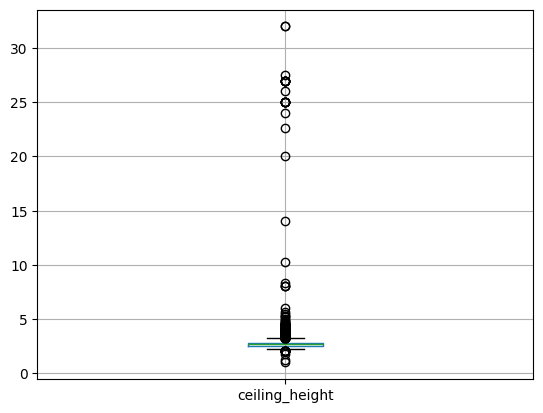

In [17]:
data[data['ceiling_height'] < 100].boxplot(column='ceiling_height')

In [18]:
data[data['ceiling_height']>10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,NaN,...,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,...,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,NaN,...,9.0,2.0,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.0
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,NaN,...,7.0,2.0,Санкт-Петербург,28981.0,10912.0,1.0,305.0,0.0,NaN,267.0
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5.0,31.3,5,NaN,...,5.7,NaN,Кронштадт,68923.0,50649.0,1.0,417.0,2.0,73.0,NaN
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5.0,30.0,2,NaN,...,5.2,NaN,Санкт-Петербург,11647.0,13581.0,0.0,NaN,0.0,NaN,NaN
10773,8,3800000.0,58.0,2017-10-13,2,27.0,10.0,30.1,3,False,...,8.1,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.0


In [19]:
data[data['ceiling_height']<2]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5712,5,1500000.0,42.8,2017-08-14,2,1.20,2.0,27.5,1,NaN,...,5.20,NaN,городской посёлок Мга,NaN,NaN,NaN,NaN,NaN,NaN,248.0
16934,5,4100000.0,40.0,2017-10-17,1,1.75,37.0,17.4,5,NaN,...,8.34,NaN,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,71.0
22590,16,6000000.0,55.0,2018-10-31,2,1.00,12.0,32.4,7,NaN,...,10.00,NaN,Санкт-Петербург,33053.0,14217.0,2.0,293.0,2.0,289.0,13.0


In [20]:
data = data.loc[data['ceiling_height'] !=100]
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] /= 10
data = data.loc[data['ceiling_height'] > 2]

In [21]:
data.sort_values(by='ceiling_height')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12755,2,1400000.0,22.5,2017-09-21,1,2.20,2.0,18.000000,2,NaN,...,4.5,1.0,село Копорье,NaN,NaN,NaN,NaN,NaN,NaN,45.0
17794,1,2300000.0,58.6,2016-05-12,3,2.25,5.0,44.100002,3,False,...,5.5,1.0,деревня Бегуницы,NaN,NaN,NaN,NaN,NaN,NaN,45.0
20507,12,5950000.0,60.0,2018-02-19,2,2.26,14.0,35.000000,11,NaN,...,13.0,1.0,Санкт-Петербург,27028.0,12570.0,0.0,NaN,0.0,NaN,40.0
5498,17,2200000.0,56.0,2018-04-02,2,2.30,5.0,45.000000,1,NaN,...,9.0,2.0,Сясьстрой,NaN,NaN,NaN,NaN,NaN,NaN,55.0
1582,4,4100000.0,45.6,2016-01-13,2,2.30,9.0,28.400000,8,False,...,7.0,2.0,Санкт-Петербург,49152.0,14977.0,1.0,489.0,1.0,525.0,329.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20264,17,119000000.0,187.6,2017-07-10,4,6.00,7.0,147.000000,7,NaN,...,15.6,NaN,Санкт-Петербург,26902.0,5605.0,3.0,484.0,1.0,305.0,259.0
15743,14,5600000.0,67.0,2016-11-11,3,8.00,16.0,41.000000,1,NaN,...,8.0,NaN,Санкт-Петербург,32691.0,11035.0,1.0,723.0,0.0,NaN,474.0
3474,3,1400000.0,30.0,2018-03-16,1,8.00,5.0,15.300000,2,False,...,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
17442,0,5350000.0,54.0,2015-06-16,2,8.00,5.0,29.000000,2,NaN,...,NaN,1.0,Красное Село,24638.0,28062.0,0.0,NaN,0.0,NaN,469.0


In [22]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
    В ходе проведения анализа высоты полтолков, я вывела аномальное значение в 100 и убрала его, так как оно по всем признакам ошибочное и является вбросом. Значения менее 2 я также отбросила и не учитывала в дальнейшей работе, так как оно слишком мало. Значения более 10, скорее всего, являются ошибочными, но часть из них можно использовать, смею предположить, из-за человеческого фактора была упущена запятая(разряд).
После того, как все аномальные значения были исключены или приведены в норму, я заполнила пропуски медианным значением.
<hr height="2px" color="#800080">
</div>

In [23]:
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8478,19,13500000.0,77.8,2019-04-17,2,2.80,NaN,39.41,21,NaN,...,13.27,2.0,Санкт-Петербург,12838.0,11477.0,1.0,593.0,1.0,130.0,NaN
10058,9,3350000.0,25.0,2018-09-10,1,2.65,NaN,17.00,21,NaN,...,3.50,NaN,посёлок Шушары,NaN,NaN,NaN,NaN,NaN,NaN,23.0
10568,12,14900000.0,100.0,2018-10-02,3,2.80,NaN,51.00,4,NaN,...,40.00,NaN,Санкт-Петербург,30766.0,8059.0,0.0,NaN,1.0,213.0,140.0
14264,13,14000000.0,94.0,2019-01-23,6,2.65,NaN,51.00,23,NaN,...,16.30,NaN,Санкт-Петербург,51333.0,13056.0,0.0,NaN,0.0,NaN,NaN
16668,0,15950000.0,108.0,2017-10-24,3,2.80,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,26402.0,5249.0,0.0,NaN,2.0,444.0,91.0
20250,5,6060000.0,60.6,2015-10-29,2,2.80,NaN,NaN,2,NaN,...,NaN,NaN,Санкт-Петербург,35231.0,13301.0,0.0,NaN,1.0,830.0,1257.0
21651,4,7143060.0,44.7,2019-01-11,1,3.00,NaN,13.79,19,NaN,...,NaN,NaN,Санкт-Петербург,9222.0,11340.0,0.0,NaN,0.0,NaN,NaN
22542,5,8500000.0,63.5,2017-05-24,2,2.80,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
23658,6,3063600.0,43.8,2016-11-28,1,2.70,NaN,14.00,8,NaN,...,15.50,2.0,Санкт-Петербург,8426.0,12082.0,2.0,24.0,1.0,271.0,246.0


In [24]:
data.loc[data['floors_total'].isna(), 'floors_total'] = data.loc[data['floors_total'].isna(), 'floor']

In [25]:
data['floors_total'] = data['floors_total'].astype('int')

In [26]:
data.sort_values(by='floors_total')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22855,16,2950000.0,31.0,2018-03-07,1,2.70,1,16.4,1,NaN,...,5.6,NaN,Зеленогорск,73115.0,54214.0,3.0,188.0,1.0,269.0,328.0
8388,20,3550000.0,48.2,2019-03-30,3,2.65,1,33.9,1,NaN,...,9.1,NaN,Сестрорецк,50046.0,31144.0,0.0,NaN,0.0,NaN,NaN
18900,2,1800000.0,65.0,2018-02-02,3,2.45,1,NaN,1,NaN,...,NaN,NaN,городской посёлок Свирьстрой,NaN,NaN,NaN,NaN,NaN,NaN,45.0
11641,6,3685000.0,44.7,2018-07-05,1,2.50,1,23.5,1,NaN,...,15.0,NaN,Санкт-Петербург,41351.0,15457.0,0.0,NaN,3.0,534.0,112.0
21603,12,1900000.0,40.0,2019-01-29,2,2.90,1,19.2,1,NaN,...,6.5,NaN,посёлок Сосново,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9370,12,7390000.0,70.0,2017-02-21,2,2.70,35,28.0,3,False,...,23.0,2.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,236.0
11079,16,9200000.0,75.0,2019-02-22,2,2.70,36,40.0,29,NaN,...,12.0,2.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN
5807,17,8150000.0,80.0,2019-01-09,2,2.70,36,41.0,13,NaN,...,12.0,5.0,Санкт-Петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52,10.5,18,NaN,...,14.0,NaN,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0


<Axes: >

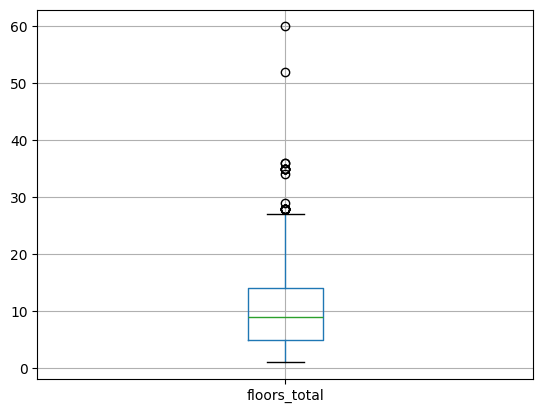

In [27]:
data.boxplot(column='floors_total')

In [28]:
data = data[data['floors_total'] < 50]

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
    Проанализировав данные о количестве этажей, я пришла к выводу о том, что пропущенные значения можно заменить этажом квартиры, так как она не имеет пропусков для этих случаев. Диаграмма "Ящик с усами" показала мне наличие аномальных значений этажей, которые были мной убраны. Также я изменила тип данных с вещественных на целые.
<hr height="2px" color="#800080">
</div>

In [29]:
data[data['living_area'].notna()].sort_values(by='living_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
13915,20,6350000.0,52.0,2018-02-06,2,3.00,6,2.0,2,NaN,...,9.0,NaN,Санкт-Петербург,32453.0,6521.0,0.0,NaN,1.0,1012.0,91.0
23574,14,64990000.0,139.0,2015-11-24,3,3.00,8,3.0,8,NaN,...,16.0,1.0,Санкт-Петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,280.0
21943,15,6100000.0,77.6,2019-02-28,4,2.50,9,5.4,1,NaN,...,9.8,NaN,Санкт-Петербург,29338.0,11270.0,1.0,584.0,0.0,NaN,33.0
16431,13,3799000.0,31.0,2018-04-12,1,2.60,5,6.0,1,NaN,...,17.0,NaN,Санкт-Петербург,32177.0,4826.0,1.0,430.0,0.0,NaN,168.0
19251,19,4050000.0,33.0,2018-10-15,1,2.50,22,6.5,21,NaN,...,18.0,NaN,Санкт-Петербург,9258.0,10592.0,1.0,458.0,0.0,NaN,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,3,49950000.0,483.9,2017-10-04,7,3.20,6,312.5,4,NaN,...,26.4,NaN,Санкт-Петербург,23079.0,945.0,3.0,461.0,3.0,22.0,391.0
12859,20,140000000.0,631.2,2019-04-09,7,3.90,4,322.3,4,NaN,...,19.5,1.0,Санкт-Петербург,25707.0,4972.0,0.0,NaN,2.0,210.0,NaN
12401,20,91500000.0,495.0,2017-06-19,7,4.65,7,347.5,7,NaN,...,25.0,0.0,Санкт-Петербург,NaN,5735.0,2.0,110.0,0.0,NaN,14.0
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6,409.0,3,NaN,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0


In [30]:
data.pivot_table(index='rooms',values='living_area', aggfunc=('median', 'count'))

,count,median
rooms,,
1,4348,17.8
2,4580,30.5
3,3580,45.0
4,762,64.0
5,209,94.8
6,71,118.4
7,40,149.3
8,6,149.8
9,6,169.9


In [31]:
data['living_area'] = data['living_area'].fillna(data.groupby('rooms')['living_area'].transform('median'))

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
    Отсортировав датафрейм без выявленных пропусков, я пришла к выводу, что аномальных значений нет. Далее я сделала небольшую сводную таблицу, которая показывает, какие значения будут вместо пропусков. Я решила, что логично будет считать пропуски как медианное значение по числу комнат, так как ранее этот столбец уже был обработан.
<hr height="2px" color="#800080">
</div>

In [32]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [33]:
data['is_apartment'] = data['is_apartment'].astype('bool').fillna(False)

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
    Проверив, что все значения в исследуемом столбце являются булевыми, я изменила его тип данных на соотвествующий, приняв пропуски за False. 
<hr height="2px" color="#800080">
</div>

In [34]:
data[data['kitchen_area'].notna()].sort_values(by='kitchen_area')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20217,7,4250000.0,28.5,2019-05-01,1,2.80,14,19.5,10,True,...,1.3,NaN,Санкт-Петербург,37199.0,12721.0,0.0,NaN,0.0,NaN,NaN
6262,9,3100000.0,24.0,2018-06-25,2,3.00,5,16.0,5,True,...,2.0,NaN,Санкт-Петербург,31960.0,4914.0,2.0,426.0,1.0,936.0,54.0
906,15,2600000.0,27.0,2017-07-10,1,2.75,23,18.0,18,True,...,2.0,0.0,Санкт-Петербург,22131.0,17459.0,0.0,NaN,1.0,411.0,10.0
21419,4,1870000.0,20.0,2018-03-06,1,2.50,5,14.0,1,True,...,2.0,NaN,Санкт-Петербург,16652.0,15654.0,1.0,619.0,1.0,937.0,45.0
8729,9,2200000.0,18.4,2018-08-20,1,2.52,3,14.0,3,True,...,2.4,NaN,Пушкин,20710.0,30687.0,0.0,NaN,1.0,155.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,18,95000000.0,216.0,2017-12-05,4,3.00,5,86.0,4,True,...,77.0,NaN,Санкт-Петербург,21740.0,436.0,2.0,138.0,3.0,620.0,14.0
4394,20,57000000.0,174.0,2015-11-09,3,3.20,10,95.0,6,True,...,77.0,NaN,Санкт-Петербург,31706.0,4166.0,1.0,193.0,3.0,199.0,1039.0
16239,5,82400000.0,181.1,2017-05-24,3,3.90,9,58.2,4,False,...,93.2,NaN,Санкт-Петербург,25525.0,5845.0,2.0,116.0,0.0,NaN,501.0
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6,409.0,3,True,...,100.0,NaN,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0


<Axes: >

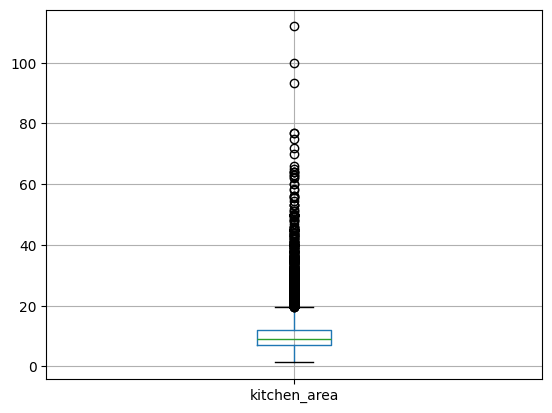

In [35]:
data.boxplot(column='kitchen_area')

In [36]:
data.pivot_table(index='rooms',values='kitchen_area', aggfunc=('median', 'count'))

,count,median
rooms,,
1,4289,9.00
2,4585,8.60
3,3581,9.50
4,757,11.00
5,205,15.20
6,69,18.00
7,40,19.75
8,5,23.60
9,6,23.05


In [37]:
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('rooms')['kitchen_area'].transform('median'))

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
    Проверив данные о площадях кухонь и построив диаграмму, мною не было выявлено аномальных значений. Я заполнила все пропуски аналогично как и с данными жилой площади.
<hr height="2px" color="#800080">
</div>

In [38]:
data[data['balcony'].notna()].sort_values(by='balcony')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4343,3,4700000.0,74.0,2016-06-14,3,2.70,3,54.4,3,False,...,9.8,0.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,60.0
3677,13,8500000.0,70.0,2015-06-03,3,3.50,6,48.0,2,True,...,10.0,0.0,Санкт-Петербург,25510.0,5831.0,2.0,128.0,0.0,NaN,602.0
17713,7,5650000.0,46.8,2017-02-11,2,3.00,5,28.2,4,True,...,6.8,0.0,Санкт-Петербург,12982.0,7364.0,0.0,NaN,0.0,NaN,98.0
19043,15,12000000.0,113.3,2017-07-19,3,3.10,6,73.5,5,True,...,15.1,0.0,Санкт-Петербург,21937.0,3749.0,1.0,519.0,0.0,NaN,30.0
13125,6,5850000.0,57.0,2017-08-21,3,2.65,5,43.0,3,True,...,5.0,0.0,Санкт-Петербург,42458.0,8910.0,2.0,612.0,0.0,NaN,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5547,2,6450000.0,71.0,2018-01-21,2,2.80,25,34.9,2,True,...,11.0,5.0,Санкт-Петербург,48847.0,16685.0,0.0,NaN,0.0,NaN,85.0
5497,3,6200000.0,53.4,2019-05-01,2,2.50,16,29.3,16,True,...,7.0,5.0,Санкт-Петербург,50740.0,13214.0,1.0,274.0,1.0,966.0,NaN
14939,10,1800000.0,66.3,2019-02-25,3,2.50,5,41.0,2,True,...,9.0,5.0,поселок Глажево,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18314,7,3800000.0,52.7,2017-01-31,2,2.50,5,29.7,4,True,...,8.2,5.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,390.0


In [39]:
data['balcony'] = data['balcony'].fillna(0).astype('int')

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
    Сперва я убедилась, что аномальных значений в столбце нет. Далее пропуски заполнила нулями и изменила тип данных в столбце на целочисленный.
<hr height="2px" color="#800080">
</div>

In [40]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Петергоф', 'посёлок Парголово',
       'деревня Кудрово', 'Пушкин', 'поселок городского типа Красный Бор',
       'посёлок Мурино', 'Сертолово', 'Гатчина', 'поселок Мурино',
       'Ломоносов', 'деревня Фёдоровское', 'Выборг', 'Кронштадт',
       'Колпино', 'Кировск', 'деревня Новое Девяткино',
       'посёлок городского типа Сиверский',
       'садовое товарищество Новая Ропша', 'Павловск', 'Всеволожск',
       'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'поселок городского типа Кузьмоловский', 'деревня Куттузи',
       'поселок Торковичи', 'посёлок Шушары', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'село Путилово',
       'Ивангород', 'Сланцы', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'деревня Оржицы', 'деревня Кальтино', 'Кудрово',
       'поселок городского типа Рощино', 'Сясьстрой', 'Кириши', 'Луга',
       'Волосово', 'по

In [41]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
duplicate_dict = {r'городской поселок|коттеджный поселок|поселок при железнодорожной станции|поселок городского типа|поселок станции|садовое товарищество|садоводческое некоммерческое товарищество|село|поселок|деревня|имени': ''}
for duplicate_locality_name, unduplicate_locality_name in duplicate_dict.items():
     data['locality_name'] = data['locality_name'].str.replace(duplicate_locality_name, unduplicate_locality_name, regex=True)

In [42]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Петергоф', ' Парголово', ' Кудрово', 'Пушкин',
       ' Красный Бор', ' Мурино', 'Сертолово', 'Гатчина', 'Ломоносов',
       ' Федоровское', 'Выборг', 'Кронштадт', 'Колпино', 'Кировск',
       ' Новое Девяткино', ' Сиверский', ' Новая Ропша', 'Павловск',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       ' Кузьмоловский', ' Куттузи', ' Торковичи', ' Шушары',
       ' Первомайское', 'Красное Село', ' Понтонный', ' Старая',
       ' Лесколово', ' Новый Свет', ' Путилово', 'Ивангород', 'Сланцы',
       'Шлиссельбург', 'Никольское', 'Зеленогорск', 'Сосновый Бор',
       ' Оржицы', ' Кальтино', 'Кудрово', ' Рощино', 'Сясьстрой',
       'Кириши', 'Луга', 'Волосово', ' Оредеж', ' Бугры', ' Металлострой',
       ' Молодежное', 'Тихвин', ' Победа', ' Нурма', ' Синявино', 'Тосно',
       ' Романовка', ' Александровская', ' Лопухинка', ' Советский',
       ' Петровское', ' Токсово', ' Келози', ' Вартемяги', 'Подпорожье',
       ' Тельмана', ' 

In [43]:
data.duplicated().sum()

np.int64(0)

In [44]:
data['locality_name'].isna().sum() / len(data)

np.float64(0.0009721547114783695)

In [45]:
data = data.dropna(subset=['locality_name']).reset_index(drop=True)

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
    Найдя уникальные значения данного столбца, я обнаружила неявные дубликаты. Путем замены я от них избавилась и сделала проверку на дубликаты строк, коих не оказалось. После чего удалила строки, в которых отсутсвовало значение, так как это ошибочные значения и их всего 0,2%. Удалив строки я также произвела переиндексацию
<hr height="2px" color="#800080">
</div>

In [46]:
data[data['airports_nearest'].notna()].sort_values(by='airports_nearest')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12841,0,7000000.0,34.7,2018-09-23,1,2.70,9,19.8,3,True,...,6.0,2,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0
4733,9,2750000.0,29.0,2017-02-19,1,2.50,4,15.0,1,False,...,6.0,0,Санкт-Петербург,6914.0,21486.0,1.0,215.0,0.0,NaN,43.0
6841,17,6200000.0,55.6,2019-02-12,2,2.54,14,34.0,2,True,...,7.6,5,Санкт-Петербург,6989.0,13205.0,1.0,535.0,0.0,NaN,NaN
6105,0,5800000.0,47.3,2017-12-01,2,2.50,25,27.5,18,True,...,8.4,2,Санкт-Петербург,6989.0,13205.0,1.0,535.0,0.0,NaN,89.0
13550,20,6290000.0,54.9,2019-03-17,2,2.50,14,34.4,5,True,...,7.6,0,Санкт-Петербург,6989.0,13205.0,1.0,535.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3180,15,3650000.0,53.8,2018-09-24,3,2.50,4,36.9,3,True,...,5.2,0,Молодежное,83758.0,64857.0,0.0,NaN,0.0,NaN,121.0
12638,1,3300000.0,43.5,2016-02-16,2,2.55,4,27.2,2,True,...,5.0,1,Молодежное,84006.0,65105.0,0.0,NaN,0.0,NaN,1043.0
357,7,4000000.0,59.0,2017-07-23,3,2.50,5,37.0,1,False,...,7.0,0,Молодежное,84665.0,65764.0,0.0,NaN,0.0,NaN,NaN
3246,19,3600000.0,50.6,2019-03-19,2,2.50,5,29.9,4,True,...,7.0,1,Молодежное,84853.0,65952.0,0.0,NaN,0.0,NaN,NaN


In [47]:
data = data[data['airports_nearest']!=0]

In [48]:
data['airports_nearest'] = data['airports_nearest'].fillna(data.groupby('locality_name')['airports_nearest'].transform('median'))

In [49]:
data[data['airports_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
9,20,5000000.0,58.0,2017-04-24,2,2.75,25,30.0,15,True,...,11.0,2,Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
16,10,1990000.0,45.8,2017-10-28,2,2.50,5,30.5,1,True,...,8.6,0,Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
17,10,3150000.0,40.0,2018-03-29,1,2.75,18,16.3,9,True,...,11.6,0,Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0
31,0,4800000.0,78.6,2017-09-17,3,2.80,9,48.8,5,True,...,11.9,2,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0
33,13,3100000.0,44.3,2017-11-07,2,2.50,5,29.0,5,True,...,5.3,0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14368,9,2450000.0,45.6,2018-02-08,1,2.80,9,17.8,2,True,...,9.0,0,Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
14371,8,2450000.0,35.0,2018-10-26,1,2.60,5,18.0,4,True,...,9.6,0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,28.0
14375,11,2350000.0,35.6,2016-06-23,1,2.50,5,17.0,4,False,...,8.3,2,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,40.0
14376,16,2100000.0,62.8,2018-09-18,4,2.50,5,45.5,3,True,...,5.5,0,Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
data['airports_nearest'] = data['airports_nearest'].fillna((data.groupby('locality_name')['airports_nearest'].transform('median')).median())

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
    Проанализировав данный столбец, я обнаружила одно аномадьное значение, которое сразу же убрала. Далее заполнила пропуски медианными значениями по населенным пунктам. Оставшиеся пропуски заполнила медианой медиан.
<hr height="2px" color="#800080">
</div>

In [51]:
data[data['cityCenters_nearest'].notna()].sort_values(by='cityCenters_nearest')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8324,2,31099000.0,159.0,2018-06-25,5,3.28,5,106.0,5,True,...,15.0,0,Санкт-Петербург,21633.0,181.0,2.0,254.0,3.0,426.0,NaN
719,1,5800000.0,33.6,2016-03-10,1,3.70,7,22.8,4,False,...,6.6,0,Санкт-Петербург,21632.0,208.0,3.0,304.0,3.0,503.0,167.0
5236,7,10990000.0,100.0,2015-12-16,3,3.90,5,37.8,3,True,...,11.6,0,Санкт-Петербург,21818.0,215.0,3.0,229.0,2.0,511.0,265.0
1182,18,9590000.0,108.0,2017-05-23,2,3.30,5,59.0,2,False,...,11.0,0,Санкт-Петербург,21908.0,287.0,3.0,359.0,3.0,290.0,69.0
12717,18,11500000.0,113.5,2018-09-17,3,4.20,7,44.2,6,True,...,21.7,1,Санкт-Петербург,21739.0,291.0,2.0,472.0,2.0,94.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3180,15,3650000.0,53.8,2018-09-24,3,2.50,4,36.9,3,True,...,5.2,0,Молодежное,83758.0,64857.0,0.0,NaN,0.0,NaN,121.0
12638,1,3300000.0,43.5,2016-02-16,2,2.55,4,27.2,2,True,...,5.0,1,Молодежное,84006.0,65105.0,0.0,NaN,0.0,NaN,1043.0
357,7,4000000.0,59.0,2017-07-23,3,2.50,5,37.0,1,False,...,7.0,0,Молодежное,84665.0,65764.0,0.0,NaN,0.0,NaN,NaN
3246,19,3600000.0,50.6,2019-03-19,2,2.50,5,29.9,4,True,...,7.0,1,Молодежное,84853.0,65952.0,0.0,NaN,0.0,NaN,NaN


In [52]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data.groupby('locality_name')['cityCenters_nearest'].transform('median'))

In [53]:
data['cityCenters_nearest'].isna().sum()

np.int64(2872)

In [54]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna((data.groupby('locality_name')['cityCenters_nearest'].transform('median')).median())

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
    При сортировке данного столбца, никаких аномальных значений я не обнаружила. Нашла пропуски и заполнила их медианным значением по населенному пункту. Оставшиеся пропуски были заполнены медианой медиан.
<hr height="2px" color="#800080">
</div>

In [55]:
data[data['parks_around3000'].notna()].sort_values(by='parks_around3000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4707,20,3975000.0,74.0,2018-08-20,3,3.2,3,43.8,2,True,...,14.0,0,Санкт-Петербург,22679.0,26104.0,0.0,NaN,1.0,498.0,112.0
11172,5,9500000.0,78.0,2018-01-14,3,2.7,27,48.0,13,True,...,10.0,0,Санкт-Петербург,30073.0,10337.0,0.0,NaN,0.0,NaN,206.0
5990,13,12000000.0,106.0,2018-07-30,6,2.8,3,70.0,1,True,...,15.0,0,Санкт-Петербург,20290.0,4733.0,0.0,NaN,1.0,238.0,NaN
5989,10,7700000.0,72.0,2017-07-21,2,2.7,16,38.0,6,True,...,11.0,1,Санкт-Петербург,11875.0,14467.0,0.0,NaN,1.0,330.0,133.0
5987,6,9900000.0,82.0,2019-03-11,3,2.8,27,43.0,19,True,...,12.5,0,Санкт-Петербург,33977.0,15076.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1032,15,12950000.0,103.2,2017-07-26,3,2.8,25,47.0,18,True,...,30.2,1,Санкт-Петербург,40584.0,12398.0,3.0,447.0,0.0,NaN,257.0
10560,12,18600884.0,139.2,2017-10-03,4,3.0,5,74.4,3,False,...,19.0,0,Санкт-Петербург,17720.0,16722.0,3.0,471.0,2.0,440.0,388.0
10557,9,8700000.0,57.0,2017-10-26,2,3.2,6,32.0,4,True,...,8.0,0,Санкт-Петербург,20465.0,2119.0,3.0,241.0,3.0,289.0,16.0
7248,12,3750000.0,56.0,2015-01-21,3,2.5,5,38.0,1,True,...,5.3,0,Петергоф,36086.0,31275.0,3.0,187.0,3.0,409.0,667.0


In [56]:
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype('int')

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
    Отсортировав данные в столбце, не было выявлено аномальных значений. Пропуски могут свидетельствовать об отуствии парков по близости, следовательно, я заполнила их нулями. Также изменила тип данных на целочисленный.
<hr height="2px" color="#800080">
</div>

In [57]:
data[data['parks_nearest'].notna()].sort_values(by='parks_nearest')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7252,7,4500000.0,44.0,2017-11-24,2,2.60,9,30.0,7,True,...,7.0,0,Санкт-Петербург,11806.0,12292.0,1,3.0,1.0,508.0,82.0
13936,8,10965000.0,69.3,2019-01-10,1,3.00,4,48.9,4,True,...,9.0,2,Зеленогорск,73391.0,54490.0,3,4.0,1.0,217.0,110.0
5666,12,3000000.0,28.1,2017-07-25,1,2.50,9,17.0,1,True,...,5.6,0,Санкт-Петербург,12051.0,11665.0,1,7.0,1.0,780.0,440.0
1527,8,4690000.0,60.3,2016-03-05,2,2.50,5,28.0,2,True,...,7.9,0,Кронштадт,69775.0,51500.0,3,9.0,3.0,345.0,146.0
11642,4,3000000.0,31.4,2018-10-19,1,2.50,9,15.9,2,True,...,8.1,0,Санкт-Петербург,41954.0,12168.0,1,10.0,0.0,NaN,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346,20,11900000.0,91.2,2018-10-04,3,3.10,4,62.0,3,True,...,10.6,0,Санкт-Петербург,36781.0,8791.0,1,2847.0,3.0,370.0,NaN
4782,16,5200000.0,44.9,2019-03-04,2,2.53,5,29.0,3,True,...,5.5,1,Санкт-Петербург,15059.0,9972.0,1,2880.0,1.0,357.0,NaN
1605,9,19150000.0,104.9,2017-08-28,3,3.00,5,61.5,4,True,...,13.5,1,Санкт-Петербург,36850.0,9016.0,1,2905.0,3.0,137.0,91.0
11711,17,14950000.0,187.0,2017-10-12,5,3.00,2,80.0,2,True,...,17.0,1,Санкт-Петербург,36805.0,8656.0,0,3013.0,3.0,537.0,49.0


<Axes: >

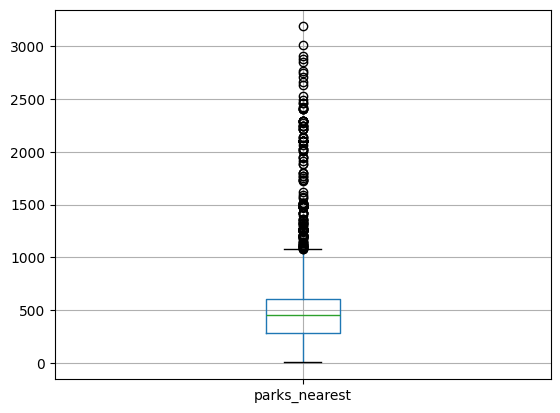

In [58]:
data.boxplot(column='parks_nearest')

In [59]:
data['parks_nearest'] = data['parks_nearest'].fillna(data.groupby('locality_name')['parks_nearest'].transform('median'))

In [60]:
data['parks_nearest'].isna().sum()

np.int64(3167)

In [61]:
data['parks_nearest'] = data['parks_nearest'].fillna((data.groupby('locality_name')['parks_nearest'].transform('median')).median())

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
    Проанализровав данные столбца, не было выявлено аномальных значений. Построив "ящик с усами", я в этом убедилась.Заполнила пропуски медианным значением, а оставшиеся пропуски - медианой медиан.
<hr height="2px" color="#800080">
</div>

In [62]:
data[data['ponds_around3000'].notna()].sort_values(by='ponds_around3000')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
7195,10,7000000.0,60.00,2017-11-17,2,2.40,12,45.0,6,True,...,11.0,2,Санкт-Петербург,16106.0,15255.0,1,761.0,0.0,NaN,40.0
6969,10,4300000.0,44.00,2018-11-15,2,2.60,5,27.8,5,True,...,5.5,0,Санкт-Петербург,41865.0,9792.0,0,457.0,0.0,NaN,90.0
6967,20,12400000.0,80.50,2017-07-10,3,3.60,4,45.6,3,True,...,12.0,0,Санкт-Петербург,24917.0,5601.0,0,457.0,0.0,NaN,246.0
6965,20,14500000.0,97.80,2018-03-06,3,2.55,4,68.8,2,True,...,13.1,0,Пушкин,14014.0,26167.0,1,609.0,0.0,NaN,256.0
6964,20,4450000.0,40.90,2016-10-14,1,2.60,14,16.5,7,True,...,12.9,1,Санкт-Петербург,32127.0,12719.0,0,457.0,0.0,NaN,558.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7118,11,10900000.0,120.50,2019-03-01,5,3.20,6,74.4,1,True,...,10.9,0,Санкт-Петербург,20594.0,1863.0,3,399.0,3.0,208.0,NaN
7129,1,12000000.0,147.90,2015-04-07,5,4.00,4,89.6,3,False,...,17.2,0,Санкт-Петербург,20882.0,1195.0,3,334.0,3.0,231.0,565.0
12941,10,3370000.0,38.20,2018-02-18,1,2.70,5,18.7,3,True,...,9.1,0,Санкт-Петербург,19306.0,21018.0,1,606.0,3.0,379.0,218.0
6912,4,11100000.0,88.40,2017-09-15,4,3.50,4,60.7,2,True,...,7.7,0,Санкт-Петербург,22181.0,729.0,2,198.0,3.0,96.0,142.0


In [63]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype('int')

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
    Отсортировав данные в столбце, не было выявлено аномальных значений. Пропуски могут свидетельствовать об отуствии прудов по близости, следовательно, я заполнила их нулями. Также изменила тип данных на целочисленный.
<hr height="2px" color="#800080">
</div>

In [64]:
data[data['ponds_nearest'].notna()].sort_values(by='ponds_nearest')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11497,9,8600000.0,68.4,2018-08-19,2,3.06,17,33.6,13,True,...,13.0,2,Санкт-Петербург,18140.0,17143.0,1,1514.0,2,16.0,31.0
1067,8,8300000.0,70.0,2016-01-29,2,3.20,8,42.0,7,False,...,12.0,2,Санкт-Петербург,18140.0,17143.0,1,1514.0,2,16.0,200.0
8147,10,6315000.0,42.0,2018-12-13,1,3.00,18,16.0,7,True,...,16.0,0,Санкт-Петербург,18649.0,17652.0,1,1304.0,2,19.0,NaN
13984,1,5300000.0,58.0,2016-02-16,2,2.70,12,30.0,3,False,...,7.5,2,Санкт-Петербург,28313.0,13188.0,1,470.0,1,20.0,722.0
9506,1,5200000.0,50.0,2017-12-19,2,2.50,12,28.0,4,True,...,7.0,0,Санкт-Петербург,28313.0,13188.0,1,470.0,1,20.0,275.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13052,15,20300000.0,130.0,2017-12-07,3,3.70,4,45.0,3,True,...,9.5,0,Санкт-Петербург,23655.0,4148.0,1,660.0,1,1293.0,90.0
7317,16,8800000.0,89.0,2018-10-11,3,3.00,5,63.9,2,True,...,9.2,0,Санкт-Петербург,36488.0,9283.0,0,457.0,1,1313.0,152.0
909,4,6950000.0,66.7,2018-11-14,3,2.65,9,42.5,5,True,...,8.5,0,Санкт-Петербург,50988.0,16316.0,0,457.0,1,1337.0,89.0
11673,20,4200000.0,39.9,2017-10-27,1,2.70,6,18.0,6,True,...,12.0,1,Стрельна,28317.0,23506.0,1,1069.0,1,1341.0,524.0


<Axes: >

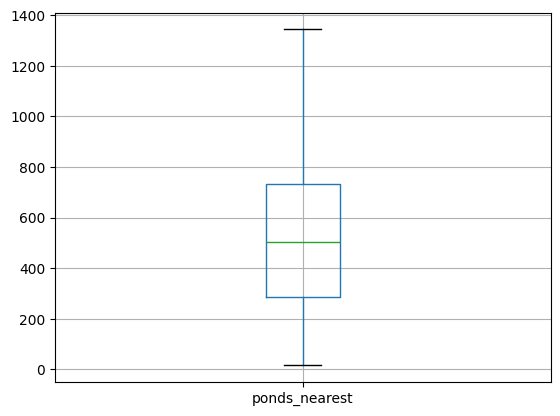

In [65]:
data.boxplot(column='ponds_nearest')

In [66]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(data.groupby('locality_name')['ponds_nearest'].transform('median'))

In [67]:
data['ponds_nearest'].isna().sum()

np.int64(2935)

In [68]:
data['ponds_nearest'] = data['ponds_nearest'].fillna((data.groupby('locality_name')['ponds_nearest'].transform('median')).median())

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
    Проанализровав данные столбца, не было выявлено аномальных значений. Построив "ящик с усами", я в этом убедилась.Заполнила пропуски медианным значением, а оставшиеся пропуски - медианой медиан.
<hr height="2px" color="#800080">
</div>

In [69]:
data[data['days_exposition'].notna()].sort_values(by='days_exposition')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1011,19,4000000.0,49.9,2019-05-01,2,2.50,9,25.0,1,True,...,10.0,0,Санкт-Петербург,13567.0,14384.0,1,20.0,1,681.0,1.0
7922,20,6100000.0,51.4,2019-04-29,2,3.00,5,31.7,4,True,...,6.9,1,Санкт-Петербург,10776.0,9389.0,0,457.0,0,507.0,2.0
9889,0,7806000.0,25.0,2019-04-30,1,3.00,5,17.8,5,False,...,9.0,0,Санкт-Петербург,36525.0,10302.0,0,457.0,0,507.0,2.0
1775,16,3690000.0,37.7,2018-11-18,1,2.55,10,17.1,8,True,...,8.7,2,Санкт-Петербург,30305.0,11331.0,1,448.0,1,919.0,3.0
4655,2,4200000.0,55.3,2019-04-23,2,3.00,15,35.0,7,True,...,10.0,0,Новое Девяткино,26725.0,12169.5,0,457.0,0,507.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8562,7,9500000.0,100.0,2015-02-19,4,3.00,5,76.0,5,True,...,10.0,0,Санкт-Петербург,25950.0,4798.0,1,690.0,0,507.0,1497.0
12773,18,13300000.0,133.0,2015-02-11,4,3.00,5,58.0,2,True,...,45.0,0,Санкт-Петербург,24653.0,5032.0,0,457.0,1,534.0,1512.0
1154,2,13300000.0,79.6,2014-12-09,2,3.00,8,42.7,7,True,...,18.0,0,Санкт-Петербург,39393.0,11096.0,1,537.0,0,507.0,1513.0
5806,11,10600000.0,80.0,2014-12-09,3,2.85,17,44.0,9,True,...,15.0,0,Санкт-Петербург,17101.0,17110.0,0,457.0,0,507.0,1553.0


In [70]:
data['days_exposition'].isna().sum()

np.int64(2441)

In [71]:
data[data['days_exposition'].isna()].sort_values(by='first_day_exposition')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
4229,17,29999000.0,133.5,2014-12-08,3,3.0,15,71.7,12,True,...,19.8,2,Санкт-Петербург,31656.0,8733.0,1,562.0,1,522.0,NaN
6689,3,8200000.0,47.1,2014-12-09,1,3.0,8,19.0,8,False,...,11.9,0,Санкт-Петербург,39393.0,11096.0,1,537.0,0,507.0,NaN
1840,20,45900000.0,143.0,2014-12-09,2,3.3,8,83.5,6,True,...,19.4,1,Санкт-Петербург,33255.0,5975.0,1,630.0,3,100.0,NaN
9962,3,17800000.0,117.7,2014-12-09,3,3.0,8,62.5,2,False,...,21.5,0,Санкт-Петербург,39393.0,11096.0,1,537.0,0,507.0,NaN
7160,3,7500000.0,46.9,2014-12-09,1,3.0,8,19.0,3,False,...,11.9,0,Санкт-Петербург,39393.0,11096.0,1,537.0,0,507.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5594,7,4300000.0,35.7,2019-05-03,1,2.7,21,15.0,12,False,...,13.0,2,Мурино,26725.0,12169.5,0,457.0,0,507.0,NaN
9694,9,2100000.0,35.8,2019-05-03,1,2.5,5,18.0,5,False,...,7.0,1,Ленинское,26725.0,12169.5,0,457.0,0,507.0,NaN
3636,0,5000000.0,48.0,2019-05-03,3,2.5,9,45.0,2,True,...,9.5,0,Санкт-Петербург,51060.0,16892.0,0,457.0,0,507.0,NaN
7508,9,3900000.0,35.6,2019-05-03,1,2.5,12,18.0,12,True,...,10.8,2,Санкт-Петербург,41522.0,12331.0,2,371.0,0,507.0,NaN


In [72]:
data.loc[data['days_exposition'].isna()]['first_day_exposition'].value_counts()

first_day_exposition
2019-04-22    38
2019-04-18    35
2019-04-15    30
2019-04-04    29
2019-04-08    27
              ..
2017-12-19     1
2017-12-21     1
2018-06-17     1
2017-07-23     1
2017-07-21     1
Name: count, Length: 632, dtype: int64

In [73]:
data_days_exposition_miss = data.pivot_table(index='first_day_exposition', values='days_exposition', aggfunc=lambda x: x.isna().sum())

In [74]:
data_days_exposition_miss.sort_values(by='days_exposition', ascending = False)

,days_exposition
first_day_exposition,
2019-04-22,38
2019-04-18,35
2019-04-15,30
2019-04-04,29
2019-04-01,27
...,...
2016-10-01,0
2016-09-30,0
2016-09-29,0


<Axes: title={'center': 'Количесвто не снятых объявлений по дате их создания'}, xlabel='first_day_exposition'>

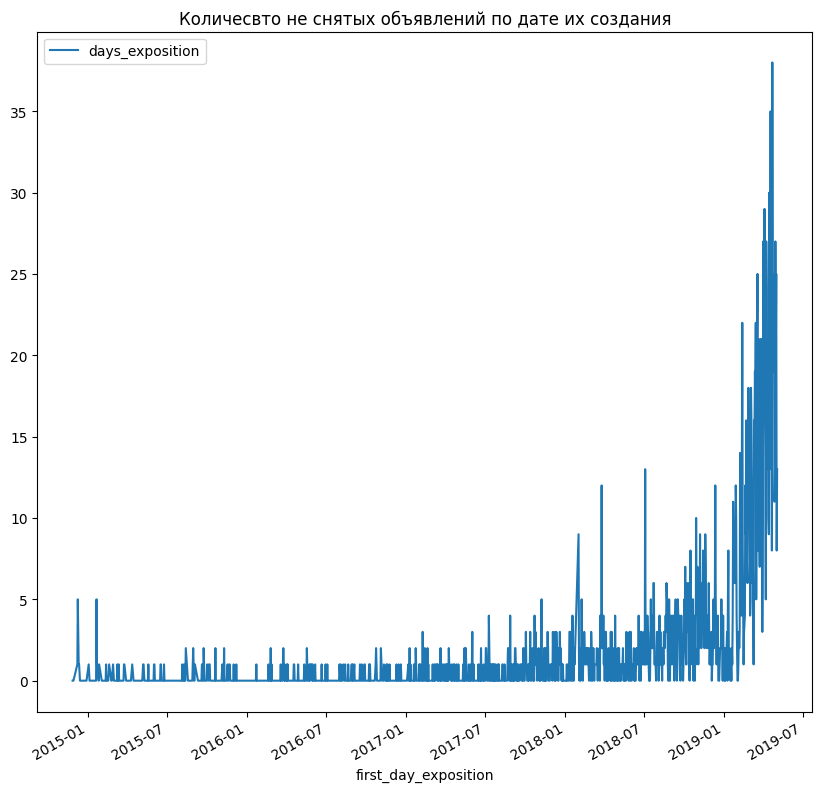

In [75]:
data_days_exposition_miss.plot.line\
(column='days_exposition',figsize=(10, 10),title='Количесвто не снятых объявлений по дате их создания')

<Axes: title={'center': 'Количесвто не снятых объявлений по дате их создания c 2017 года'}, xlabel='first_day_exposition'>

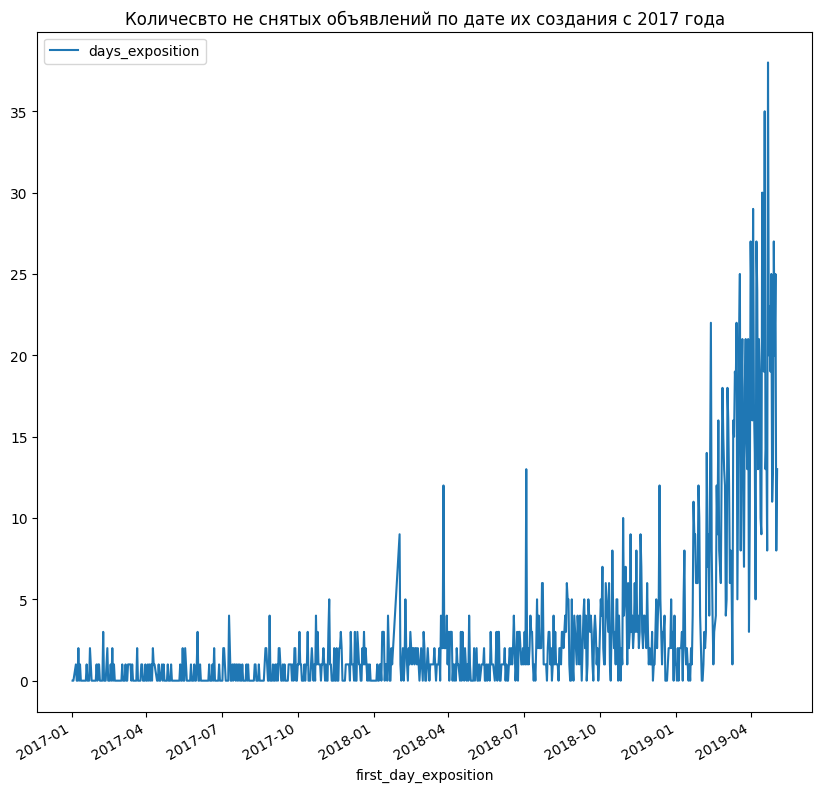

In [76]:
data_days_exposition_miss[data_days_exposition_miss.index > '2017-01-01'].plot.line\
(column='days_exposition',figsize=(10, 10),title='Количесвто не снятых объявлений по дате их создания c 2017 года')

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
    Не было выявлено аномальных значений. Для построения графика распределения была создана сводная таблица. По итогу анализа можно сделать вывод о том, что объявления без даты их снятия были еще активны на момент сбора данных, так как их количество растет по мере увеличения даты.
<hr height="2px" color="#800080">
</div>

### Добавьте в таблицу новые столбцы

In [77]:
data['last_price_per_square'] = (data['last_price'] / data['total_area']).astype('float')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_per_square
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370
1,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000
2,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,True,...,2,Санкт-Петербург,50898.0,15008.0,0,457.0,0,507.0,289.0,88524.590164
3,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,True,...,0,Санкт-Петербург,38357.0,13878.0,1,310.0,2,553.0,137.0,127525.252525
4,20,3550000.0,42.8,2017-07-01,2,2.56,5,27.0,5,True,...,1,Петергоф,37868.0,33058.0,1,294.0,3,298.0,366.0,82943.925234


<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
В исходную таблицу я добавила новую колонку с ценой одного квадратного метра, значения для этой колонки я взяла из результата деления цены на общую площадь
<hr height="2px" color="#800080">
</div>

In [78]:
data['first_day_exposition_weekday'] = data['first_day_exposition'].dt.weekday
data['first_day_exposition_month'] = data['first_day_exposition'].dt.month
data['first_day_exposition_year'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_per_square,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,16028.0,1,482.0,2,755.0,NaN,120370.370370,3,3,2019
1,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,8098.0,2,112.0,1,48.0,121.0,100000.000000,1,6,2018
2,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,True,...,15008.0,0,457.0,0,507.0,289.0,88524.590164,6,2,2017
3,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,True,...,13878.0,1,310.0,2,553.0,137.0,127525.252525,3,11,2017
4,20,3550000.0,42.8,2017-07-01,2,2.56,5,27.0,5,True,...,33058.0,1,294.0,3,298.0,366.0,82943.925234,5,7,2017


<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
В исходную таблицу были добавлены новые колноки, которые отображают год, месяц и номер дня недели начиная с понедельника(0)
<li>Понедельник - 0</li>
<li>Вторник - 1</li>
<li>Среда - 2</li>
<li>Четверг - 3</li>
<li>Пятница - 4</li>
<li>Суббота - 5</li>
<li>Воскресенье - 6</li>
<hr height="2px" color="#800080">
</div>

In [79]:
def first_last_other_floor(dataset):
    if dataset['floor'] == 1:
         return 'Первый'
    if dataset['floor'] == dataset['floors_total']:
        return 'Последний'
    return 'Другой'
data['floor_category'] = data.apply(first_last_other_floor, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_per_square,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,1,482.0,2,755.0,NaN,120370.370370,3,3,2019,Другой
1,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,2,112.0,1,48.0,121.0,100000.000000,1,6,2018,Другой
2,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,True,...,0,457.0,0,507.0,289.0,88524.590164,6,2,2017,Другой
3,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,True,...,1,310.0,2,553.0,137.0,127525.252525,3,11,2017,Другой
4,20,3550000.0,42.8,2017-07-01,2,2.56,5,27.0,5,True,...,1,294.0,3,298.0,366.0,82943.925234,5,7,2017,Последний


<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
Для того чтобы добавить колонку с категорией этажа, я сделала простую функцию, которая возвращает категорю этажа в зависимости от его номера и общего количества этажей в доме. После написания этой функции я просто применила ко всей таблице и записала результат в добавленную колону
<hr height="2px" color="#800080">
</div>

In [80]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_per_square,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,floor_category,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,True,...,482.0,2,755.0,NaN,120370.370370,3,3,2019,Другой,16.028
1,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,True,...,112.0,1,48.0,121.0,100000.000000,1,6,2018,Другой,8.098
2,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,True,...,457.0,0,507.0,289.0,88524.590164,6,2,2017,Другой,15.008
3,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,True,...,310.0,2,553.0,137.0,127525.252525,3,11,2017,Другой,13.878
4,20,3550000.0,42.8,2017-07-01,2,2.56,5,27.0,5,True,...,294.0,3,298.0,366.0,82943.925234,5,7,2017,Последний,33.058


<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
Для того чтобы добавить в исходную таблицу колонку с обозначением растояния до центра города в киломаетрах, я просто разделила расторяние в метрах на 1000, полученные результат записала в новый столбец 
<hr height="2px" color="#800080">
</div>

### Проведите исследовательский анализ данных

In [81]:
data['total_area'].describe()

count    14386.000000
mean        62.064254
std         36.933135
min         12.000000
25%         41.300000
50%         53.700000
75%         71.500000
max        900.000000
Name: total_area, dtype: float64

<Axes: >

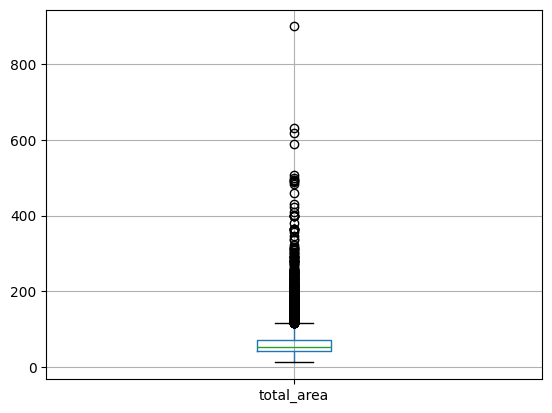

In [82]:
data.boxplot(column='total_area')

<Axes: >

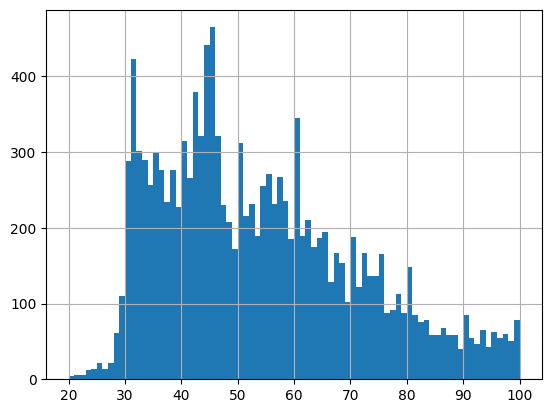

In [83]:
data['total_area'].hist(bins=80, range=(20, 100))

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
В исследуемом наборе данных, полагаясь на визуальное отображение данных, я пришла к заключению, что наиболее распространенные на продажу жилые помещения имеют площадь от 30 до 45 м², но при этом также популярны планировки с площадью в 50 и 60 м².
<hr height="2px" color="#800080">
</div>

In [84]:
data['living_area'].describe()

count    14386.000000
mean        35.707945
std         22.703906
min          2.000000
25%         19.100000
50%         30.500000
75%         43.682500
max        409.700000
Name: living_area, dtype: float64

<Axes: >

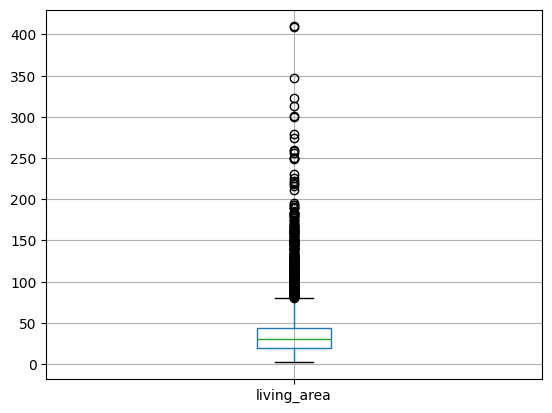

In [85]:
data.boxplot(column = 'living_area')

<Axes: >

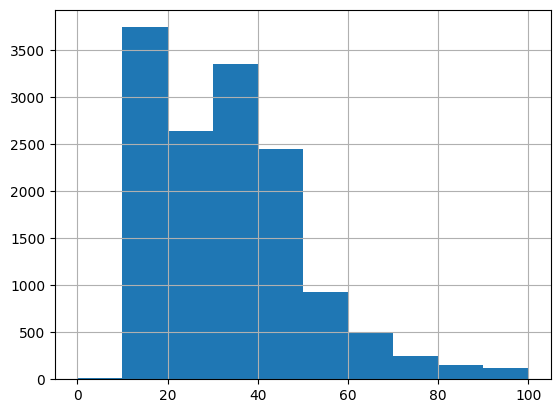

In [86]:
data['living_area'].hist(bins=10, range=(0, 100))

In [87]:
(data['living_area'] / data['total_area']).mean()

np.float64(0.5692408975019049)

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
В исследуемом наборе данных, полагаясь на визуальное отображение данных, я пришла к заключению, что наиболее распространенные на продажу жилые помещения имеют пригодную для проживания площадь от 20 до 40 м². Также в я могу сказать что в среднем жилая площадь составляет 56,286% от всей площади.
<hr height="2px" color="#800080">
</div>

In [88]:
data['kitchen_area'].describe()

count    14386.000000
mean        10.498973
std          5.889617
min          1.300000
25%          7.100000
50%          9.000000
75%         11.700000
max        112.000000
Name: kitchen_area, dtype: float64

<Axes: >

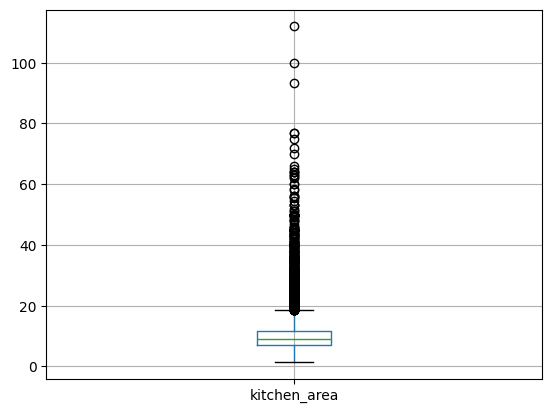

In [89]:
data.boxplot(column='kitchen_area')

<Axes: >

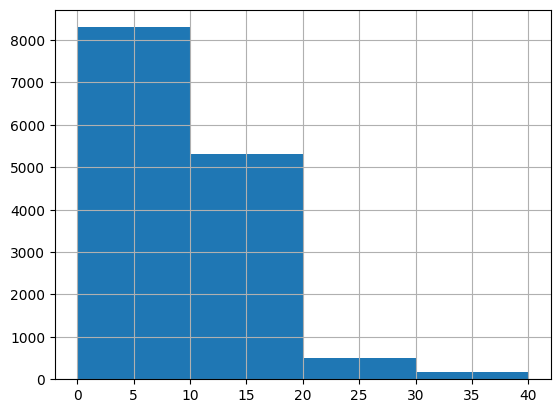

In [90]:
data['kitchen_area'].hist(bins=4,range=(0,40))

In [91]:
data['kitchen_area'].mean() / data['total_area'].mean()

np.float64(0.1691629659220885)

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
В исследуемом наборе данных, полагаясь на визуальное отображение данных, я пришла к заключению, что наиболее распространенные на продажу жилые помещения имеют пригодную для проживания площадь от 20 до 40 м². Также я могу сказать что в среднем кухонная территоря занимает около 17,267% от общей площади.
<hr height="2px" color="#800080">
</div>

In [92]:
data['last_price'].describe()

count    1.438600e+04
mean     6.853591e+06
std      1.020193e+07
min      4.500000e+05
25%      3.592250e+06
50%      4.897500e+06
75%      7.086646e+06
max      4.200000e+08
Name: last_price, dtype: float64

<Axes: >

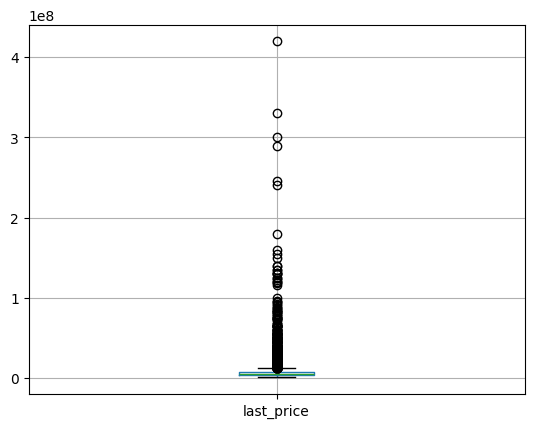

In [93]:
data.boxplot(column='last_price')

<Axes: >

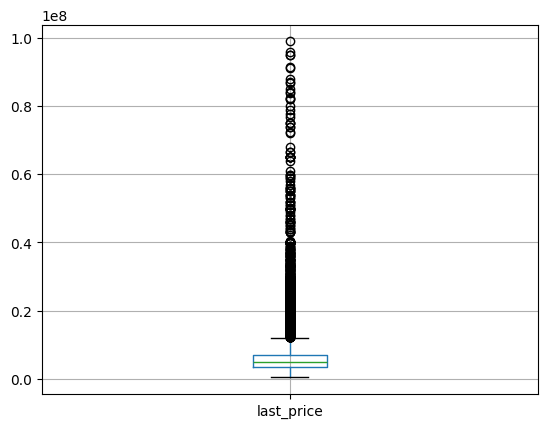

In [94]:
data.query('last_price <= 100000000').boxplot(column='last_price')

<Axes: >

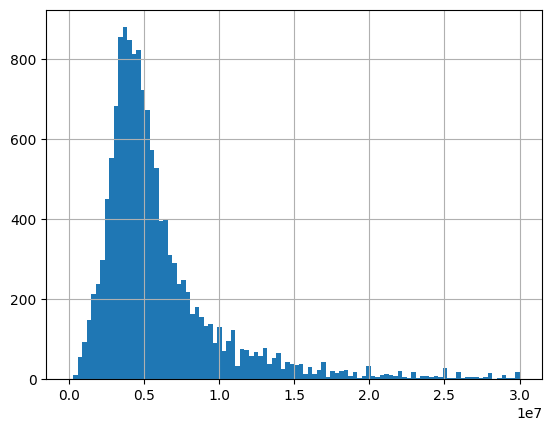

In [95]:
data['last_price'].hist(bins=100, range=(0, 30000000))

In [96]:
data['last_price_per_square'].describe()

count    1.438600e+04
mean     1.015450e+05
std      5.054664e+04
min      9.615385e+03
25%      7.837013e+04
50%      9.666667e+04
75%      1.164259e+05
max      1.736842e+06
Name: last_price_per_square, dtype: float64

<Axes: >

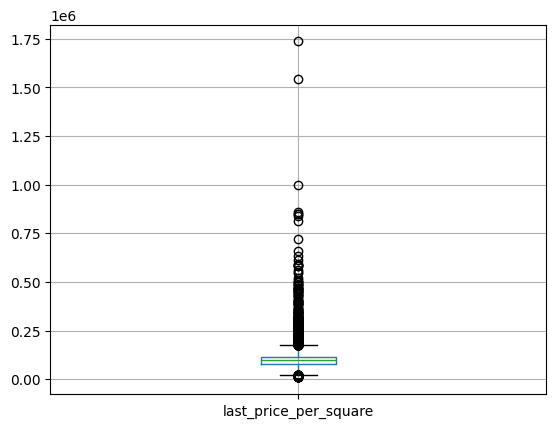

In [97]:
data.boxplot(column='last_price_per_square')

<Axes: >

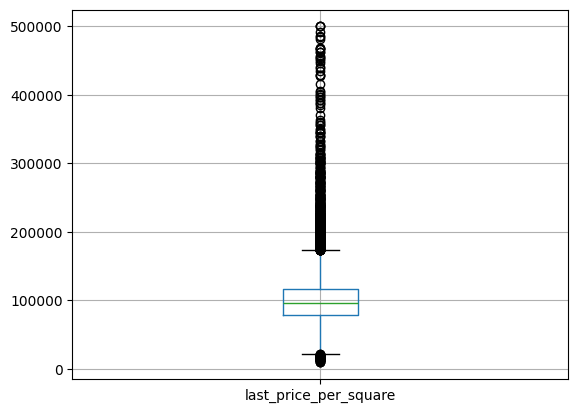

In [98]:
data.query('last_price_per_square <= 500000').boxplot(column='last_price_per_square')

<Axes: >

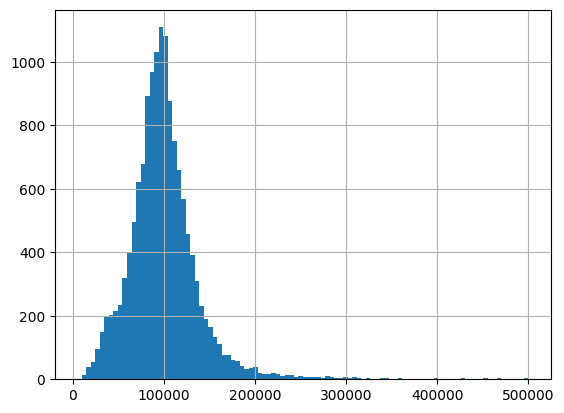

In [99]:
data['last_price_per_square'].hist(bins=100, range=(5000, 500000))

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
В исследуемом наборе данных, для оценки стоимотси жилплощади необходимо пологаться не только на саму стоимость, но и на стоимсоть за м². Полагаясь на визуальное отображение данных, я пришла к выводу, что хоть стоимость всей площади имеет большую хаотичнсоть в сравнении со стоимостью одного м². В среднем цена на жилое помещение около 4 миллионов, а цена за квадратный м² около 100000, при делении одонго на другое выходит 40 м², что в свою очередь лишний раз поддтверждает ранее сделанный вывод при ислледовании общей площади 
<hr height="2px" color="#800080">
</div>

In [100]:
data['rooms'].describe()

count    14386.000000
mean         2.149798
std          1.090490
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

<Axes: >

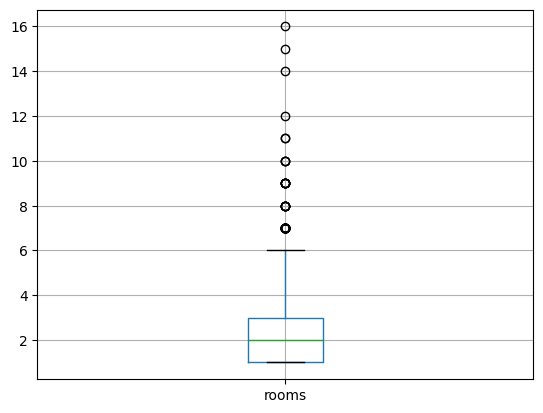

In [101]:
data.boxplot(column='rooms')

<Axes: >

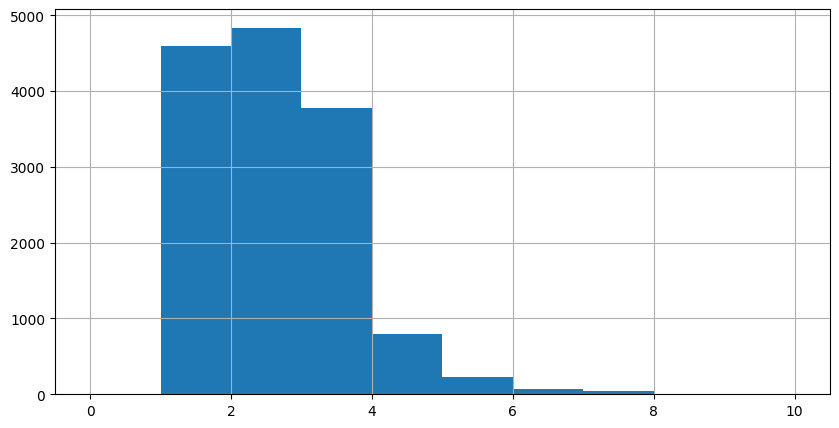

In [102]:
data['rooms'].hist(bins=10, range=(0, 10),figsize=(10,5))

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
Из анализа визуализации данных о количестве комнат в представленном наборе данных видно, что основная часть продаваемого жилья имеет до двух комнат. Трехкомнатные квартиры продаются реже, а с увеличением количества комнат предложения снижаются экспоненциально
<hr height="2px" color="#800080">
</div>

In [103]:
data['ceiling_height'].describe()

count    14386.000000
mean         2.727991
std          0.291030
min          2.200000
25%          2.510000
50%          2.650000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64

<Axes: >

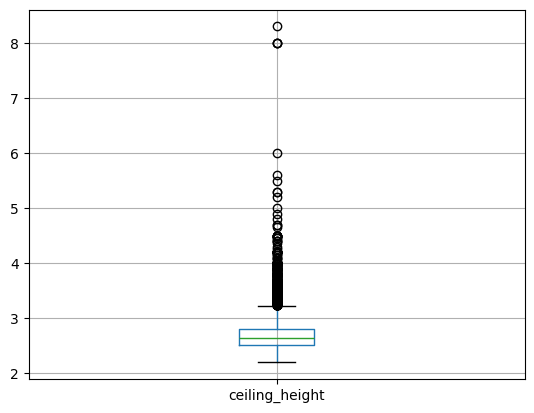

In [104]:
data.boxplot(column='ceiling_height')

<Axes: >

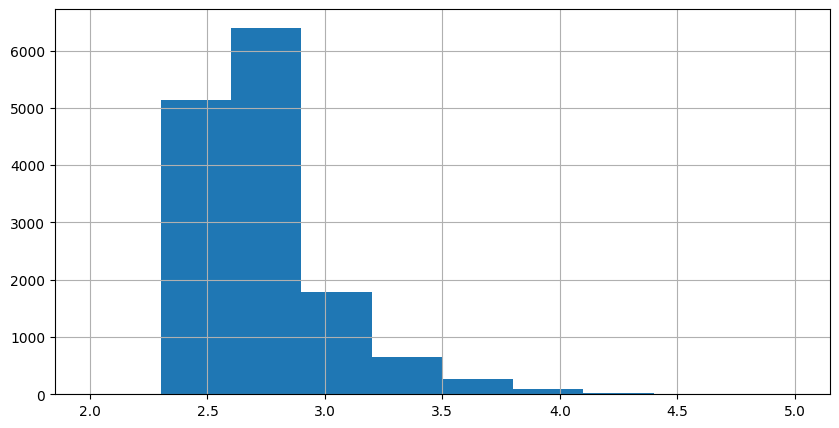

In [105]:
data['ceiling_height'].hist(bins=10, range=(2, 5),figsize=(10,5))

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
Из анализа визуализации данных высоты потолковв представленном наборе данных видно, что подавляющая часть продаваемого жилья имеет высоту примерно от 2,5 до 2,8 метров
<hr height="2px" color="#800080">
</div>

<Axes: >

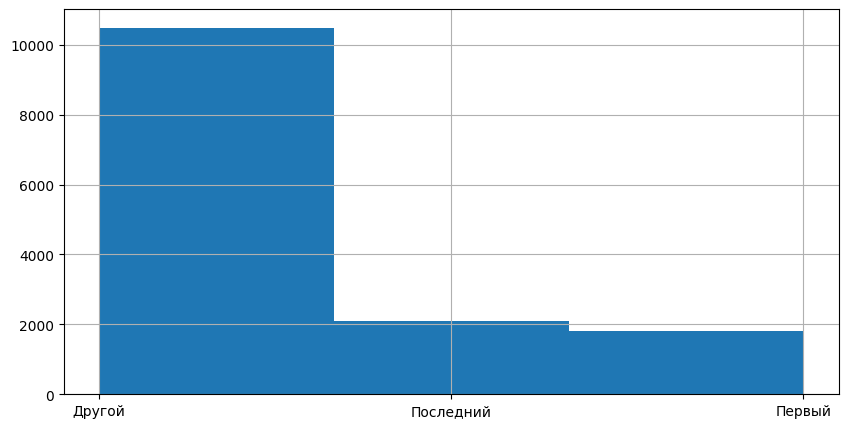

In [106]:
data['floor_category'].hist(bins=3,figsize=(10,5))

In [107]:
data['floor_category'].value_counts()

floor_category
Другой       10491
Последний     2087
Первый        1808
Name: count, dtype: int64

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
Из анализа категории этажа, полученого путем анализа исходных данных было предсказумо, что количество продавамой недвижемости, которая не на первом или последнем этаже, многократно превышает количество объявлений по продаже квартиры на крайних этажах. Но не смотря на это я могу сделать вывод что количетсво продаваемых квартир на последних этажах немного превышает количеству квартир на первых. Это может быть связано с тем, что первые этажи занимают коммерчиские, не жилые помещения, также на первых этажаъ могут находится пункты охраны, работы консъержа, рецепшен или иные сооружения, наличие которых, уменьшает непосредственную плотность заселение первых этажей.
<hr height="2px" color="#800080">
</div>

In [108]:
data['floors_total'].describe()

count    14386.000000
mean        10.138051
std          6.155001
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         36.000000
Name: floors_total, dtype: float64

In [109]:
data['floors_total'].value_counts().sort_index()

floors_total
1       10
2      212
3      398
4      784
5     3650
6      616
7      395
8      219
9     2550
10     748
11     107
12     849
13     117
14     337
15     222
16     853
17     493
18     272
19     132
20     154
21      63
22     141
23     194
24     212
25     515
26      53
27      71
28       9
29       1
34       1
35       6
36       2
Name: count, dtype: int64

<Axes: >

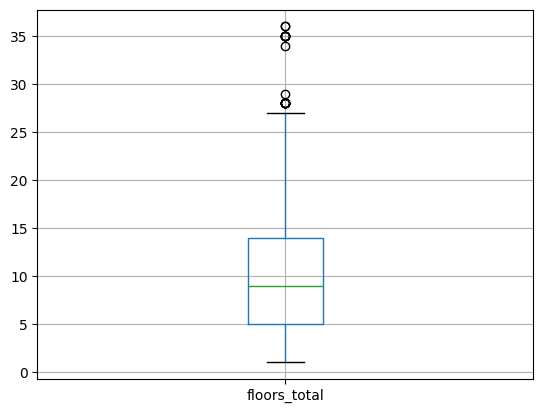

In [110]:
data.boxplot(column='floors_total')

<Axes: >

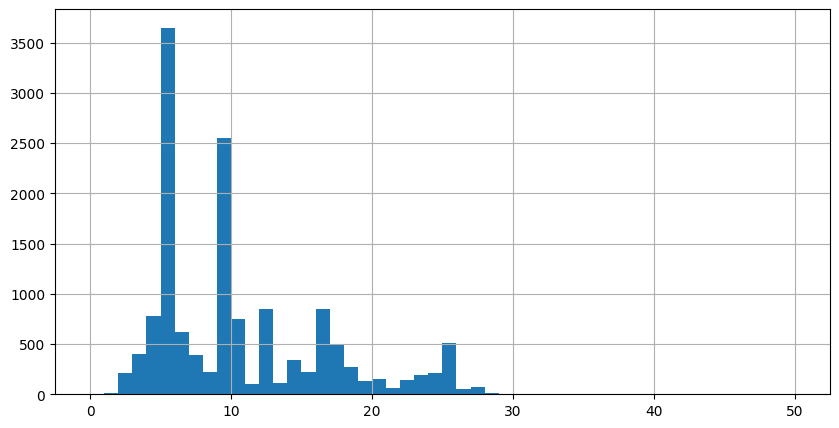

In [111]:
data['floors_total'].hist(bins=50, range=(0, 50),figsize=(10,5))

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
Из анализа и визуализации данных количества этажей в жилых помещениях из представленного набора данных видно, что в подавляющая часть продаваемого жилья это пяти или девяти этажные здания, полагаю что это связано с историей застройки, также мы можем наюлюдать хаотичность данных отдалясь от медианного значения, это может быть связанно с тем, что различные застройщики вводили новые высотные здания с различной этажностью
<hr height="2px" color="#800080">
</div>

In [112]:
data['cityCenters_nearest'].describe()

count    14386.000000
mean     13697.474663
std       7878.429711
min        181.000000
25%      10602.000000
50%      12169.500000
75%      15203.250000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

<Axes: >

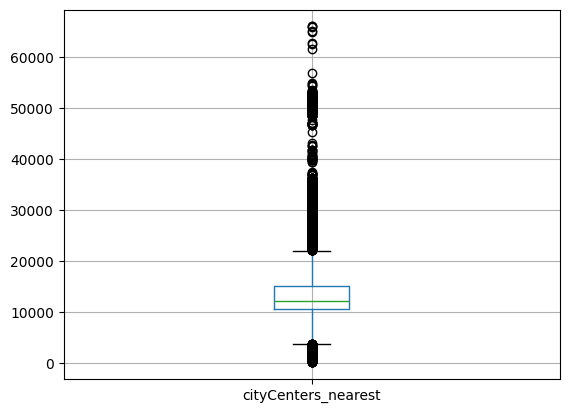

In [113]:
data.boxplot(column='cityCenters_nearest')

<Axes: >

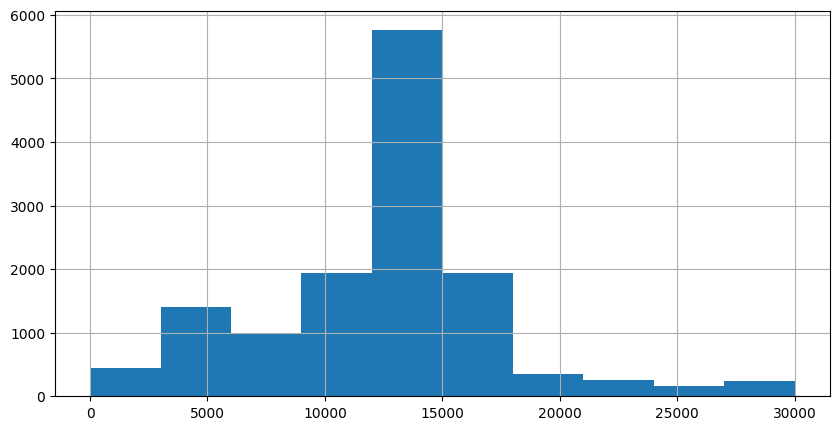

In [114]:
data['cityCenters_nearest'].hist(bins=10, range=(0, 30000),figsize=(10,5))

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
Из анализа и визуализации данных отдаленности жилых помещений от центра города из представленного набора данных видно, что в подавляющая часть продаваемого жилья находитсяэто 12-13 км от центра и примерно равномерно идет дальнейшее распределение как на приближении, так и на отдаление от центра первые несколько сотен метров, после чего идет увеличения количества на отдаление, эти данные могут свидетельствовать о неравномернсоти застройки и заселения
<hr height="2px" color="#800080">
</div>

In [115]:
data['parks_nearest'].describe()

count    14386.000000
mean       458.976401
std        196.829251
min          3.000000
25%        457.000000
50%        457.000000
75%        457.000000
max       3190.000000
Name: parks_nearest, dtype: float64

<Axes: >

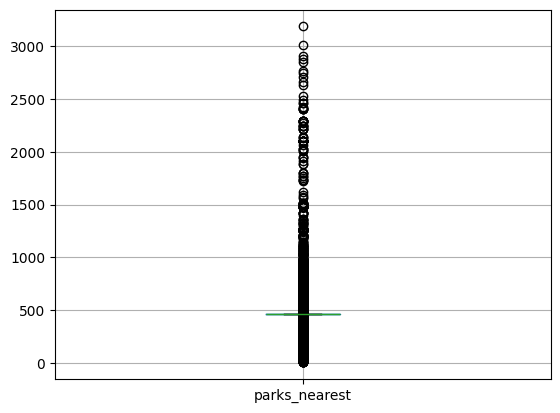

In [116]:
data.boxplot(column='parks_nearest')

<Axes: >

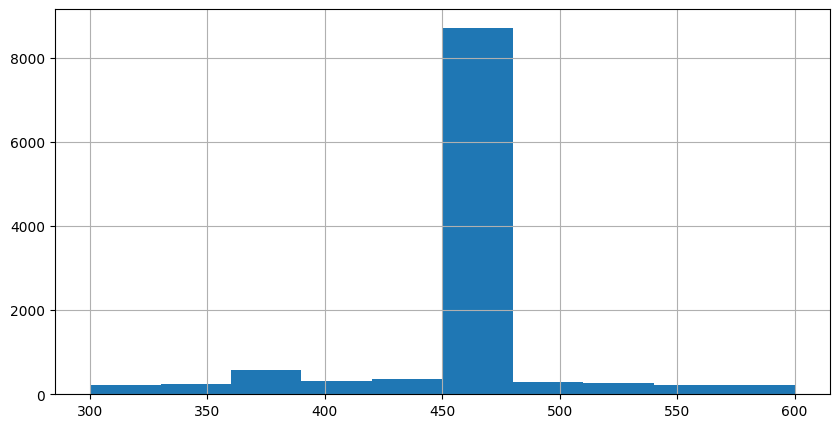

In [117]:
data['parks_nearest'].hist(bins=10, range=(300, 600),figsize=(10,5))

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
Из анализа и визуализации данных отдаленности жилых помещений от ближайших парков, видно что в подавляющее большинство парков находятся примерно в 450 метрах от помещений, данные по остальным отдаленностям крайне не многочислены.
<hr height="2px" color="#800080">
</div>

In [118]:
normal_data = data.query('(total_area <= 100) and (last_price_per_square <= 170000) and (rooms <= 6) and (ceiling_height <= 3)')
normal_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_per_square,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,floor_category,cityCenters_nearest_km
2,18,5400000.0,61.0,2017-02-26,3,2.50,9,43.6,7,True,...,457.0,0,507.0,289.0,88524.590164,6,2,2017,Другой,15.008
3,5,5050000.0,39.6,2017-11-16,1,2.67,12,20.3,3,True,...,310.0,2,553.0,137.0,127525.252525,3,11,2017,Другой,13.878
4,20,3550000.0,42.8,2017-07-01,2,2.56,5,27.0,5,True,...,294.0,3,298.0,366.0,82943.925234,5,7,2017,Последний,33.058
6,8,3250000.0,31.0,2017-01-27,1,2.50,5,19.4,2,True,...,759.0,0,507.0,168.0,104838.709677,4,1,2017,Другой,10.842
8,12,6120000.0,80.0,2017-09-28,3,2.70,27,48.0,11,True,...,189.0,0,593.0,74.0,76500.000000,3,9,2017,Другой,19.311


In [119]:
round((100 - len(normal_data) / len(data) * 100),2)

16.69

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
Для дальнейшего анализа я создала новую таблицу, в которую вошли все данные, без верхних вбросов, тем самым остались наиболее нормальные значения, по итогам вышло что 16.69% данных были убраны.
</div>

In [120]:
normal_data['days_exposition'] = normal_data['days_exposition'].fillna(0).astype('int')
normal_data['days_exposition'].describe()

/tmp/ipykernel_137401/3643690889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_data['days_exposition'] = normal_data['days_exposition'].fillna(0).astype('int')


count    11985.000000
mean       149.777472
std        208.863898
min          0.000000
25%         18.000000
50%         68.000000
75%        189.000000
max       1580.000000
Name: days_exposition, dtype: float64

<Axes: >

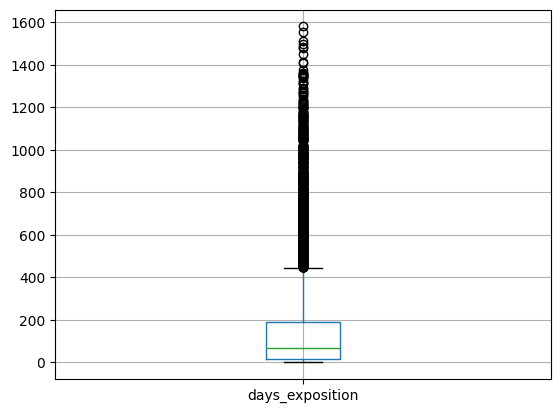

In [121]:
normal_data.boxplot('days_exposition')

<Axes: >

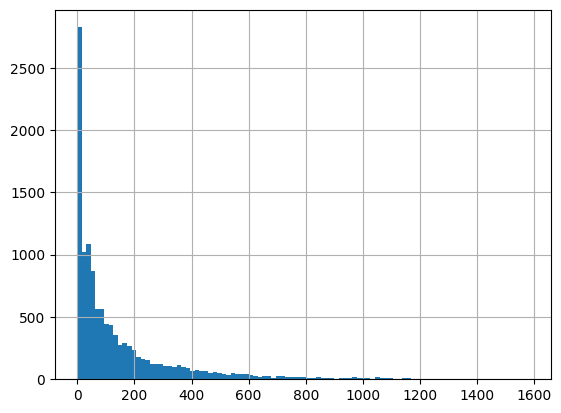

In [122]:
normal_data['days_exposition'].hist(bins=100)

<Axes: >

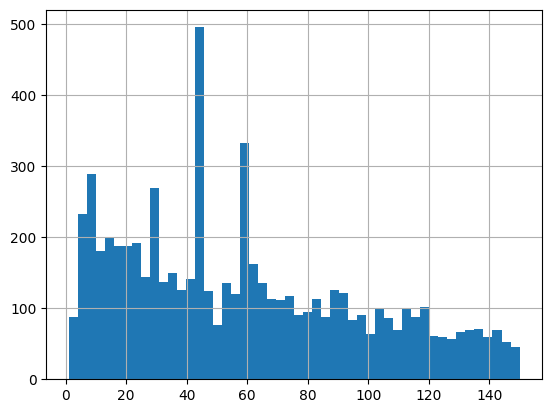

In [123]:
normal_data['days_exposition'].hist(bins=50,range=(1,150))

In [124]:
normal_data['days_exposition'].value_counts().sort_values(ascending=False).head(50)

days_exposition
0     1835
45     383
60     246
7      137
30     130
4       89
3       86
8       82
14      81
5       77
18      76
28      75
11      70
9       70
20      67
6       67
23      66
10      65
21      64
29      64
24      63
22      62
13      60
15      59
26      59
61      59
43      56
16      56
19      56
63      56
44      56
35      56
17      55
90      55
37      54
41      52
54      51
33      50
52      49
74      49
59      49
65      49
34      48
67      47
32      47
27      47
64      47
62      47
42      46
56      46
Name: count, dtype: int64

In [125]:
normal_data = normal_data[~normal_data['days_exposition'].isin([45,60,7,30,0])]

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
Количество объявлений закрытых за 45,60,7 и 30 дней слишком много на фоне остальных. Поэтому я решила что даты с этими объявлениями имеют аномалию. Но значенмя этих дат слишком "красивые", поэтому я предпологаю, что эти объявления были автоматически закрыты по каким-то причинам. Не закрытые объявления считаю также не нужны при анализе, поэтому от них я также избавилась
<hr height="2px" color="#800080">
</div>

In [126]:
normal_data['days_exposition'].describe()

count    9254.000000
mean      189.996650
std       221.948192
min         1.000000
25%        44.000000
50%       110.000000
75%       246.000000
max      1580.000000
Name: days_exposition, dtype: float64

<Axes: >

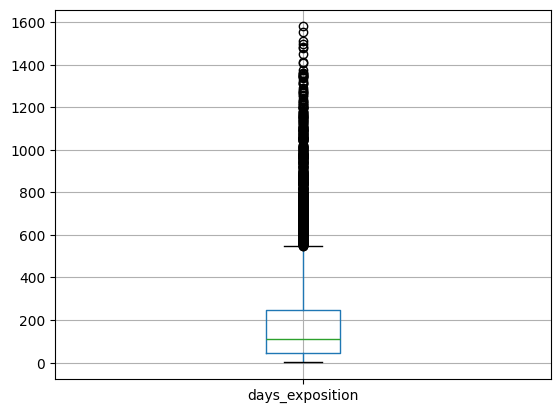

In [127]:
normal_data.boxplot('days_exposition')

<Axes: >

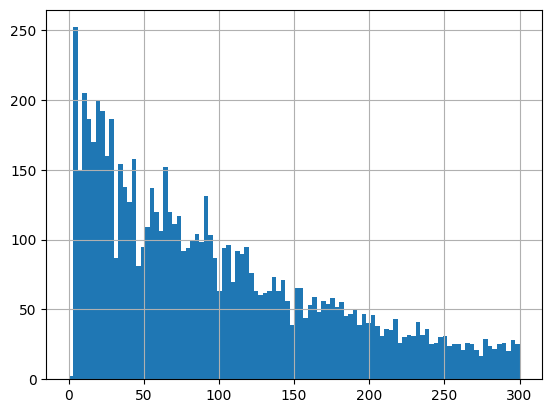

In [128]:
normal_data['days_exposition'].hist(bins=100,range=(0,300))

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
Изучив данные о времени продажи жилых помещений, отбросив все не проданные на момент сбора данных и все аномальные значения, я пришла к выводу что время продажи похоже на Паусоновское распределение. Среднее время продажи составляет 190 дней, а медианное время 110 со среднем отклонением в 222 дня, нижний и верхний квартили равны 44 и 246 дням соответсвенно. На основании этих данных можно сделать вывод, что при продаже жилого помещения в пределах от 50 до 110 дней будет быстрой продажей, если меньше 50 дней, то это будет считать очень быстрой сделкой, в то время как превышения в 250 дней говорит об очень долгой продаже  
<hr height="2px" color="#800080">
</div>

np.float64(0.7122427461813526)

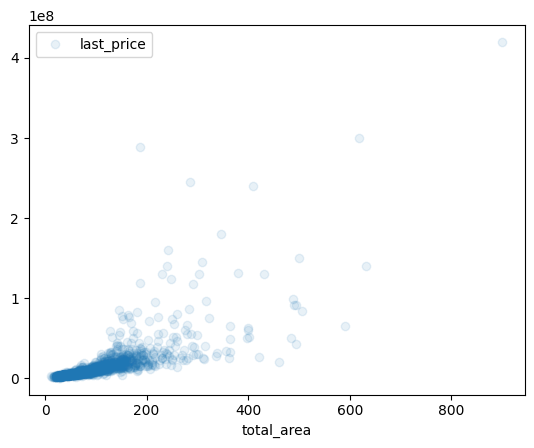

In [129]:
data.pivot_table(index='total_area', values='last_price', aggfunc='median').plot(style='o',alpha=0.1)
data['total_area'].corr(data['last_price'])

np.float64(0.7184956658868629)

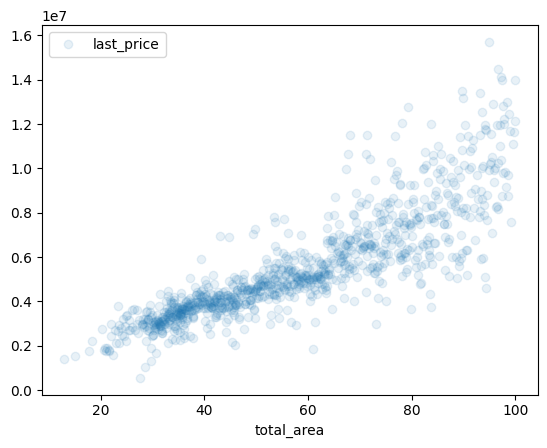

In [130]:
normal_data.pivot_table(index='total_area', values='last_price', aggfunc='median').plot(style='o',alpha=0.1)
normal_data['total_area'].corr(normal_data['last_price'])

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
Построив график, который показывает зависимость стоимости от всей площади видна логичная закономерность что с увеличением площади, растет и цена. Построив аналогичный график для таблицы в которой находятся только нормальные данные, тенденция сохранилась, но немного увеличилось значение корреляции, что в свою очередб означает что при нормальных значениях взаимосвязь между ценой и площадью более сильная, а следовательно лучше пологаться на нормальные данные 
<hr height="2px" color="#800080">
</div>

np.float64(0.6047923649482038)

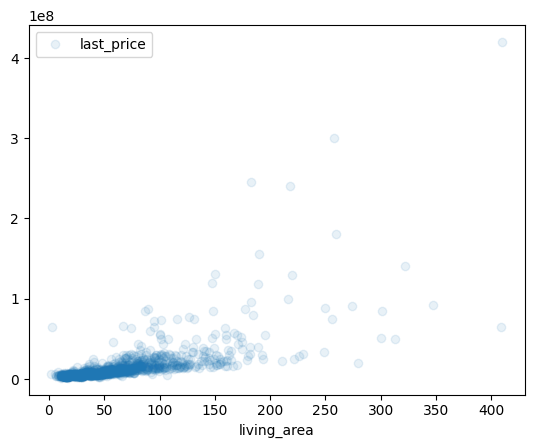

In [131]:
data.pivot_table(index='living_area', values='last_price', aggfunc='median').plot(style='o',alpha=0.1)
data['living_area'].corr(data['last_price'])

np.float64(0.5569674168247543)

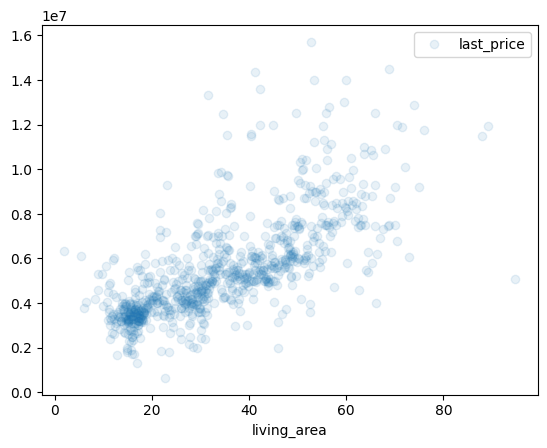

In [132]:
normal_data.pivot_table(index='living_area', values='last_price', aggfunc='median').plot(style='o',alpha=0.1)
normal_data['living_area'].corr(normal_data['last_price'])

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
Построив график, который показывает зависимость стоимости от жилой площади видна логичная закономерность что с увеличением площади, растет и цена. Построив аналогичный график для таблицы в которой находятся только нормальные данные, тенденция сохранилась, но немного уменьшилось значение корреляции, что сведетельсвует о том, что не стоит пологаться в ценообразовании на данный параметр. Также зависимоить цены от жилой площади меньшая чем, от общей, это может быть связано с различными планировками квартир, при которых одна и таже общая площадь имеет разную жилую
<hr height="2px" color="#800080">
</div>

np.float64(0.5212225900906052)

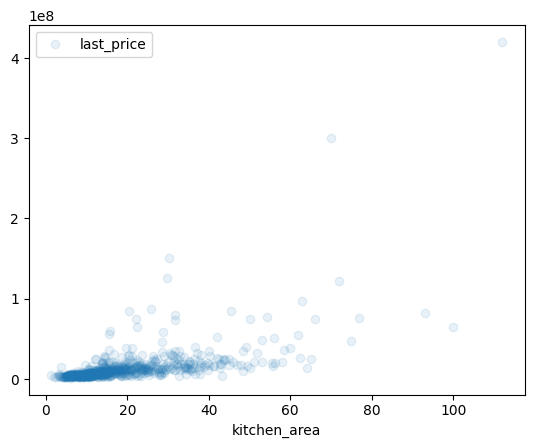

In [133]:
data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median').plot(style='o',alpha=0.1)
data['kitchen_area'].corr(data['last_price'])

np.float64(0.4979853242544226)

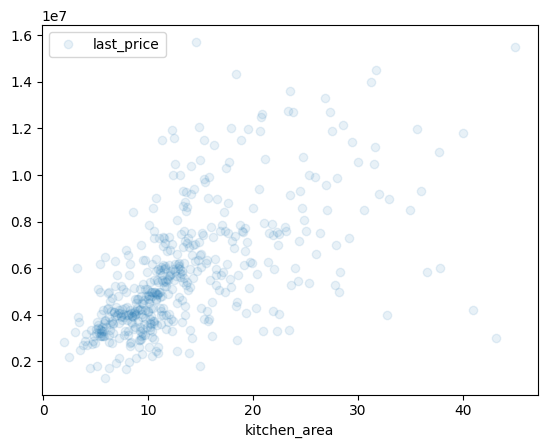

In [134]:
normal_data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median').plot(style='o',alpha=0.1)
normal_data['kitchen_area'].corr(normal_data['last_price'])

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
Построив график, который показывает зависимость стоимости от площади кухонь видна закономерность увеличения цены с площадью. Построив аналогичный график для таблицы в которой находятся только нормальные данные, тенденция сохранилась, но немного уменьшилось значение корреляции, что сведетельсвует о том, что не стоит пологаться в ценообразовании на данный параметр. Также зависимоить цены от кухонной площади меньшая чем, от общей или жилой, это может быть связано с различными планировками квартир, при которых одна и таже общая площадь имеет разную кухонную
<hr height="2px" color="#800080">
</div>

np.float64(0.40362787310189174)

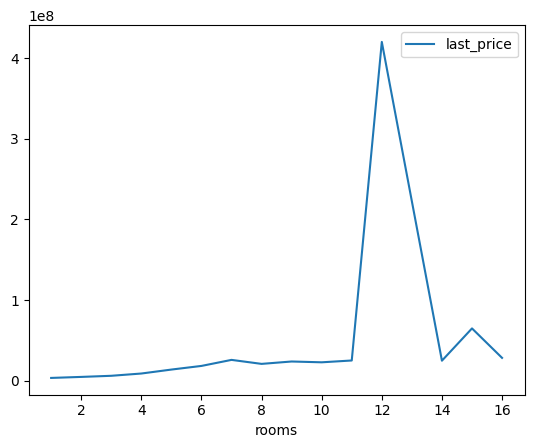

In [135]:
data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(style='-')
data['rooms'].corr(data['last_price'])

np.float64(0.43090849741681997)

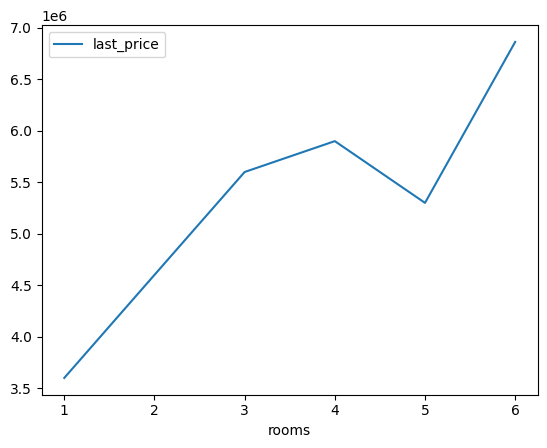

In [136]:
normal_data.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(style='-')
normal_data['rooms'].corr(normal_data['last_price'])

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
Построив график, который показывает зависимость стоимости от количества комнат видна закономерность увеличения цены с количества комнат. Построив аналогичный график для таблицы в которой находятся только нормальные данные, тенденция сохранилась, но немного увеличелось корреляция, что также отчетливо видно на графике. Также зависимоить цены от количества комнат меньшая чем, от оплощадей, это может быть связано с различными планировками квартир, поэтому количество комнат не может быть ценообразуещим фактором
<hr height="2px" color="#800080">
</div>

,last_price
floor_category,
Другой,5030000.0
Первый,4095000.0
Последний,4550000.0


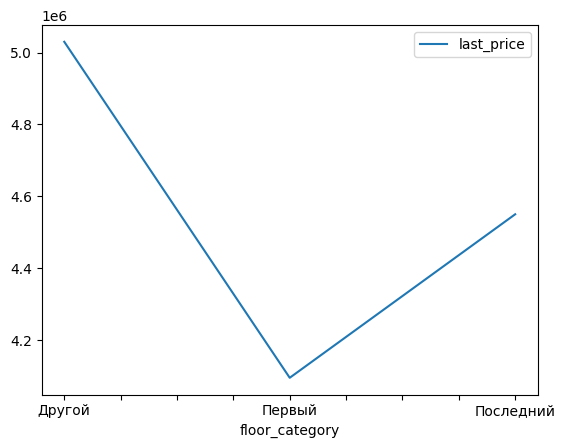

In [137]:
data.pivot_table(index='floor_category', values='last_price', aggfunc='median').plot(style='-')
data.pivot_table(index='floor_category', values='last_price', aggfunc='median')

,last_price
floor_category,
Другой,4500000.0
Первый,3800000.0
Последний,4000000.0


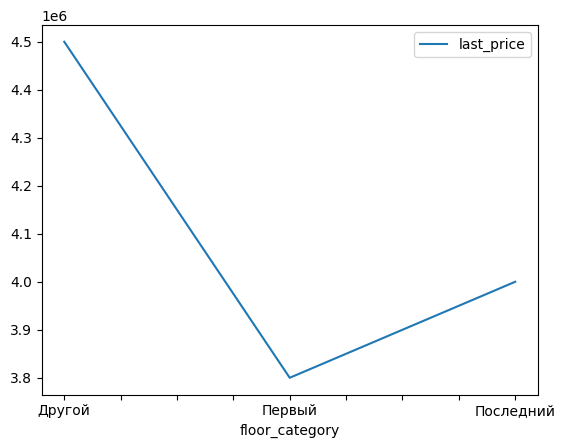

In [138]:
normal_data.pivot_table(index='floor_category', values='last_price', aggfunc='median').plot(style='-')
normal_data.pivot_table(index='floor_category', values='last_price', aggfunc='median')

In [139]:
print(f'''Разница в стоимости между последним и первым этажом в исходных данных: \
{round((1-data.query('floor_category == "Первый"')['last_price'].median() / data.query('floor_category == "Последний"')['last_price'].median())*100,4)}%''')
print(f'''Разница в стоимости между последним и другими этажами в исходных данных: \
{round((1-data.query('floor_category == "Последний"')['last_price'].median() / data.query('floor_category == "Другой"')['last_price'].median())*100,4)}%''')
print(f'''Разница в стоимости между первым и другими этажами в исходных данных: \
{round((1-data.query('floor_category == "Первый"')['last_price'].median() / data.query('floor_category == "Другой"')['last_price'].median())*100,4)}%''')
print('-'*100)
print(f'''Разница в стоимости между последним и первым этажом в нормальных данных: \
{round((1-normal_data.query('floor_category == "Первый"')['last_price'].median() / normal_data.query('floor_category == "Последний"')['last_price'].median())*100,4)}%''')
print(f'''Разница в стоимости между последним и другими этажами в нормальных данных: \
{round((1-normal_data.query('floor_category == "Последний"')['last_price'].median() / normal_data.query('floor_category == "Другой"')['last_price'].median())*100,4)}%''')
print(f'''Разница в стоимости между первым и другими этажами в нормальных данных: \
{round((1-normal_data.query('floor_category == "Первый"')['last_price'].median() / normal_data.query('floor_category == "Другой"')['last_price'].median())*100,4)}%''')

Разница в стоимости между последним и первым этажом в исходных данных: 10.0%
Разница в стоимости между последним и другими этажами в исходных данных: 9.5427%
Разница в стоимости между первым и другими этажами в исходных данных: 18.5885%
----------------------------------------------------------------------------------------------------
Разница в стоимости между последним и первым этажом в нормальных данных: 5.0%
Разница в стоимости между последним и другими этажами в нормальных данных: 11.1111%
Разница в стоимости между первым и другими этажами в нормальных данных: 15.5556%


<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
Построив график, который показывает зависимость стоимости от категории этажа видно, что крайние этажи дешевле других, а первые не в почете. Построив аналогичный график для таблицы в которой находятся только нормальные данные, тенденция сохранилась. К сожалению графики не очень информативные, поэтому я подготовила небольшую сводку по которой можно увидеть насколько занижают цену на первых и последних этажах по сравнению друг с другом и иными этажами 
<hr height="2px" color="#800080">
</div>

,median,count
,last_price,last_price
first_day_exposition_weekday,,
0,4900000.0,2358
1,5000000.0,2619
2,4900000.0,2386
3,4899000.0,2617
4,4790000.0,2279
5,4700000.0,1152
6,4700000.0,975


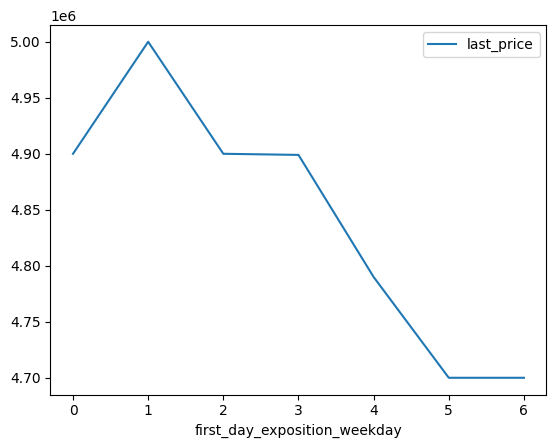

In [140]:
data.pivot_table(index='first_day_exposition_weekday', values='last_price', aggfunc='median').plot(style='-')
data.pivot_table(index='first_day_exposition_weekday', values='last_price', aggfunc=['median','count'])

,median,count
,last_price,last_price
first_day_exposition_weekday,,
0,4350000.0,1470
1,4500000.0,1674
2,4370000.0,1509
3,4350000.0,1696
4,4300000.0,1525
5,4370000.0,750
6,4350000.0,630


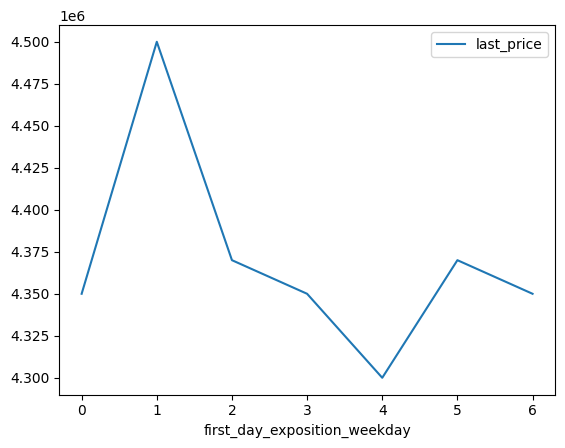

In [141]:
normal_data.pivot_table(index='first_day_exposition_weekday', values='last_price', aggfunc='median').plot(style='-')
normal_data.pivot_table(index='first_day_exposition_weekday', values='last_price', aggfunc=['median','count'])

In [142]:
print(f"Корреляция дня недели и цены в исходной таблице: {data['first_day_exposition_weekday'].corr(data['last_price'])}")
print(f"Корреляция дня недели и цены в нормальной таблице: {normal_data['first_day_exposition_weekday'].corr(normal_data['last_price'])}")

Корреляция дня недели и цены в исходной таблице: -0.015926142703659423
Корреляция дня недели и цены в нормальной таблице: -0.02366089205045105


<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
Построив график, который показывает зависимость стоимости от дня недели, можно заметить что пик цен приходится на вторник, в то время как на выходных их стоимость минимальна. Построив аналогичный график для таблицы в которой находятся только нормальные данные, тенденция сохранилась, но данные стали выглядеть более правдоподобно, так низ теперь не на выходных, а в пятницу, и на выходных идет колебающийся рост, который сохраянется в понедельник до пика вторника, после чего снова идет на спад. График построенный по нормальным данным выглядит более логичным и цикличным. 
Вычислив корреляцию мы можем заметить что она отрицательная, НО это логично ведь день недели не количественный, а более качественный параметр, поэтому корреляция для него невозможна!
<hr height="2px" color="#800080">
</div>

,median,count
,last_price,last_price
first_day_exposition_month,,
1,4950000.0,918
2,4900000.0,1681
3,4720000.0,1719
4,5000000.0,1472
5,4800000.0,691
6,4650000.0,905
7,4980000.0,1055
8,4900000.0,1083


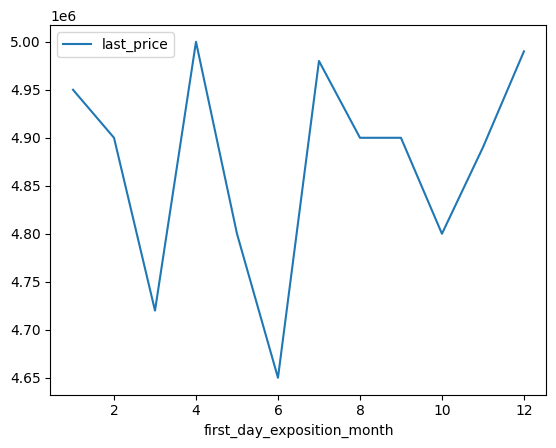

In [143]:
data.pivot_table(index='first_day_exposition_month', values='last_price', aggfunc='median').plot(style='-')
data.pivot_table(index='first_day_exposition_month', values='last_price', aggfunc=['median','count'])

,median,count
,last_price,last_price
first_day_exposition_month,,
1,4494999.5,570
2,4400000.0,1080
3,4280000.0,975
4,4410000.0,658
5,4399500.0,456
6,4250000.0,671
7,4300000.0,721
8,4400000.0,755


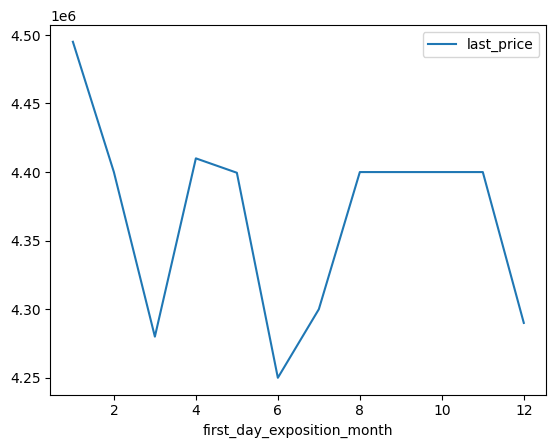

In [144]:
normal_data.pivot_table(index='first_day_exposition_month', values='last_price', aggfunc='median').plot(style='-')
normal_data.pivot_table(index='first_day_exposition_month', values='last_price', aggfunc=['median','count'])

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
Построив график, который показывает зависимость стоимости от месяца, можно заметить что пик цен приходится на апрель, в то время как на июнь цена минимальная, и какой-то стабильности цены нет. Построив аналогичный график для таблицы в которой находятся только нормальные данные, видно что пик цен уже в январе, в то время как в июне все также минимальная цена, с последующим ростом до августа и стабильной ценой до конца осени. График с нормальными данными более логичный. Люди повышиют цены на не проданные квартиры в январе, в начале года, когда выплачивается многим 13 зарплата и в целом идет повышение цен на все, после чего рынок начинает играть с повышением либо понижением
<hr height="2px" color="#800080">
</div>

,median,count
,last_price,last_price
first_day_exposition_year,,
2014,7700000.0,75
2015,5600000.0,603
2016,4850000.0,1367
2017,4750000.0,4406
2018,4700000.0,5747
2019,5200000.0,2188


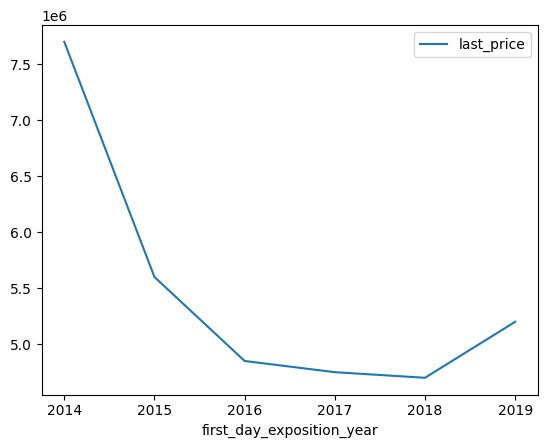

In [145]:
data.pivot_table(index='first_day_exposition_year', values='last_price', aggfunc='median').plot(style='-')
data.pivot_table(index='first_day_exposition_year', values='last_price', aggfunc=['median','count'])

,median,count
,last_price,last_price
first_day_exposition_year,,
2014,5650000.0,39
2015,4575000.0,410
2016,4300000.0,1009
2017,4300000.0,3259
2018,4399000.0,3903
2019,4700000.0,634


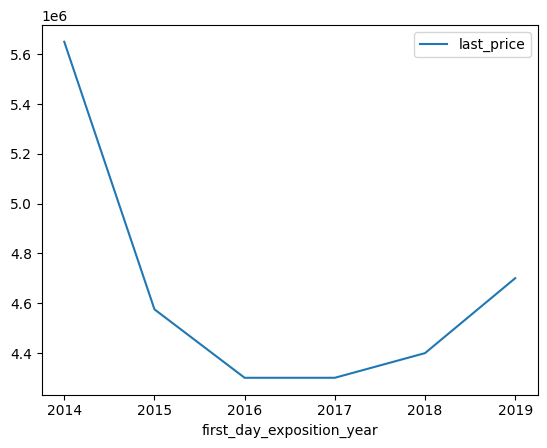

In [146]:
normal_data.pivot_table(index='first_day_exposition_year', values='last_price', aggfunc='median').plot(style='-')
normal_data.pivot_table(index='first_day_exposition_year', values='last_price', aggfunc=['median','count'])

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
Построив графики для исходных и нормальных данный в поисках зависимости цены на жилплощадь от года, видим что графики похожи. Единмтвенное что сильно смущают ценыв 2014 году, которые вероятно были слишком завышенные и через год начали приходить в норму. Судя по нормальным данным начиная с 2016 года, рынок пришедший в норму закрепился в 2017 году и начал стабильынй рост, считаю что если бы были данные и на последующие года, то примерно в 2022-2023 мы бы наблюдали небольшой падение цен, и после снова их рост на протяжении 4-5 лет
<hr height="2px" color="#800080">
</div>

In [147]:
top_10_sales_locality_name = normal_data['locality_name'].value_counts().sort_values(ascending=False).head(10)
print(top_10_sales_locality_name)

locality_name
Санкт-Петербург    6154
 Мурино             198
Всеволожск          196
 Шушары             167
Пушкин              154
Колпино             146
Петергоф            113
 Кудрово            109
Гатчина             106
 Парголово          104
Name: count, dtype: int64


In [148]:
top_10_sales_locality = normal_data[normal_data['locality_name'].isin(top_10_sales_locality_name.index)]
top_10_sales_locality

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_per_square,first_day_exposition_weekday,first_day_exposition_month,first_day_exposition_year,floor_category,cityCenters_nearest_km
2,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.6,7,True,...,457.0,0,507.0,289,88524.590164,6,2,2017,Другой,15.008
3,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.3,3,True,...,310.0,2,553.0,137,127525.252525,3,11,2017,Другой,13.878
4,20,3550000.0,42.80,2017-07-01,2,2.56,5,27.0,5,True,...,294.0,3,298.0,366,82943.925234,5,7,2017,Последний,33.058
6,8,3250000.0,31.00,2017-01-27,1,2.50,5,19.4,2,True,...,759.0,0,507.0,168,104838.709677,4,1,2017,Другой,10.842
8,12,6120000.0,80.00,2017-09-28,3,2.70,27,48.0,11,True,...,189.0,0,593.0,74,76500.000000,3,9,2017,Другой,19.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14379,8,3300000.0,31.00,2017-04-29,1,2.55,9,18.0,6,True,...,140.0,1,317.0,193,106451.612903,5,4,2017,Другой,11.602
14381,13,3550000.0,35.30,2018-02-28,1,2.86,15,16.3,4,True,...,353.0,2,652.0,29,100566.572238,2,2,2018,Другой,16.081
14382,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,True,...,457.0,1,806.0,519,129903.978052,3,10,2016,Другой,4.489
14383,9,4600000.0,62.40,2016-08-05,3,2.60,9,40.0,8,True,...,352.0,1,675.0,239,73717.948718,4,8,2016,Другой,34.104


In [149]:
top_10_sales_locality.pivot_table(index='locality_name', values='last_price_per_square', aggfunc=['mean'])\
.sort_values(by=('mean', 'last_price_per_square'),ascending=False)

,mean
,last_price_per_square
locality_name,
Санкт-Петербург,104129.617652
Пушкин,98798.610422
Кудрово,90181.318027
Парголово,89928.974885
Мурино,86629.072927
Петергоф,82673.405424
Шушары,78311.420417
Колпино,75462.007771


<Axes: title={'center': 'Средняя цена за м² жил площади в топ 10 продоваемых населенных пунктах'}, xlabel='Населенный пункт', ylabel='Средняя цена в ₽ за м²'>

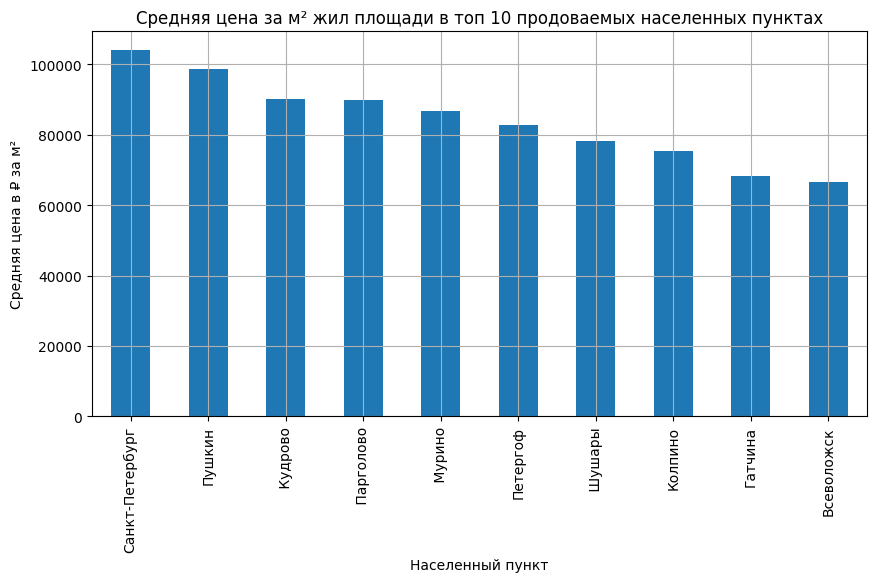

In [150]:
top_10_sales_locality.pivot_table(index='locality_name', values='last_price_per_square', aggfunc=['mean'])\
.sort_values(by=('mean', 'last_price_per_square'),ascending=False)\
.plot(kind='bar',legend=False,title='Средняя цена за м² жил площади в топ 10 продоваемых населенных пунктах'\
      ,xlabel='Населенный пункт',ylabel='Средняя цена в ₽ за м²',figsize=(10,5),grid=True)

<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
Для того чтобы найти топ 10 населенных пуктов я использовла метод value_counts(), примененный к столбцу locality_name, тем самым посчитав количество объявлений в населенных пунктах, после сортировки выделила первые 10. Названия этих населенных пунктов были использованы при создании вспомогательной таблицы, в которой находятся объявления из ранее найденых населенных пуктов. В конце же я сделала сводную таблицу с подссветом средней цены за м², тем самым найдя самые дорогие и дешевые цены за единицу площади. Самой дорогой площадью может похвастаться Санкт-Петербург со средней ценой в 104129.617652 ₽ за м², в то время как в Всеволожске цена 66491.343870 ₽ за м².
<hr height="2px" color="#800080">
</div>

In [151]:
spb_normal_data = normal_data.query('locality_name == "Санкт-Петербург"')
spb_data = data.query('locality_name == "Санкт-Петербург"')

<Axes: title={'center': 'Цена квартиры в растонии от цента в м, по нормальным данным'}, xlabel='cityCenters_nearest'>

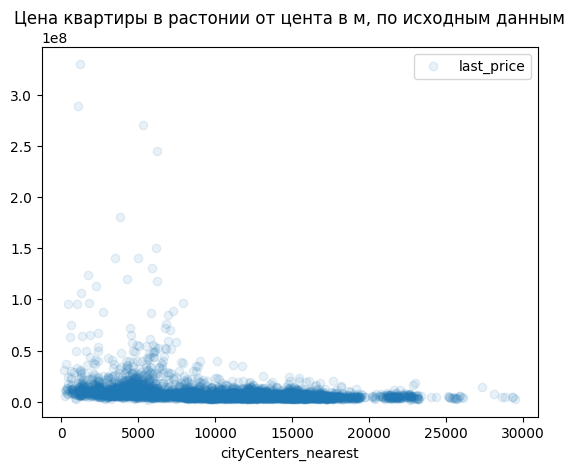

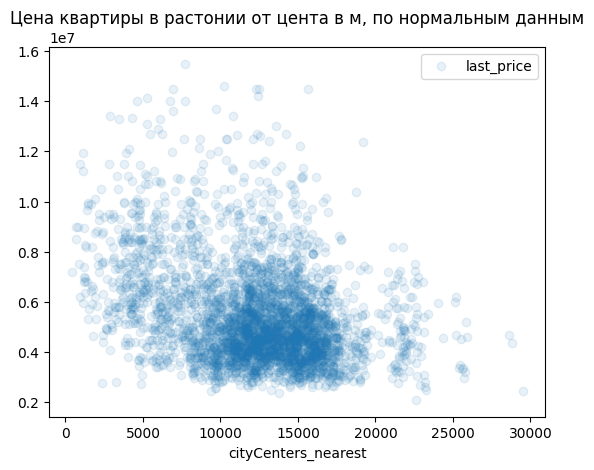

In [152]:
spb_data.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='mean').plot(style='o',alpha=0.1,\
title='Цена квартиры в растонии от цента в м, по исходным данным')

spb_normal_data.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='mean').plot(style='o',alpha=0.1,\
title='Цена квартиры в растонии от цента в м, по нормальным данным')

In [153]:
spb_data.loc[:, 'cityCenters_nearest_km'] = spb_data['cityCenters_nearest_km'].astype('int')
spb_normal_data.loc[:, 'cityCenters_nearest_km'] = spb_normal_data['cityCenters_nearest_km'].astype('int')

<Axes: title={'center': 'Динамика цен на квартиру от мединной стоимости по удалению от центра в км из нормальных данных'}, xlabel='cityCenters_nearest_km'>

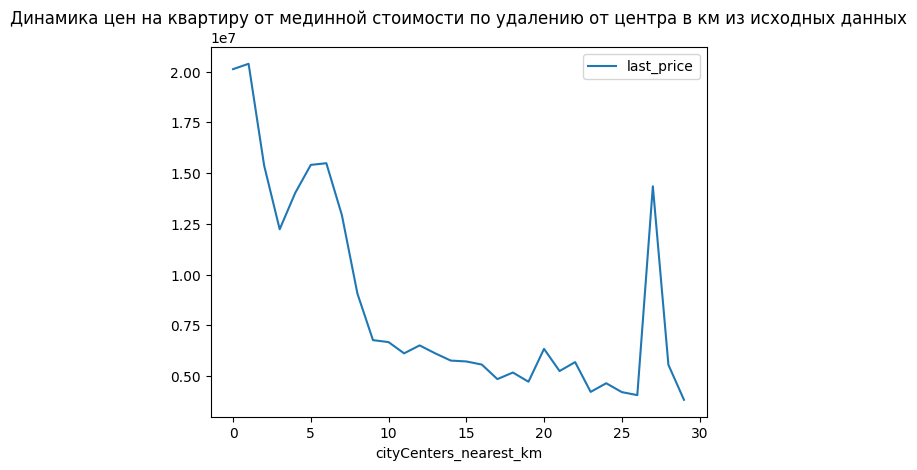

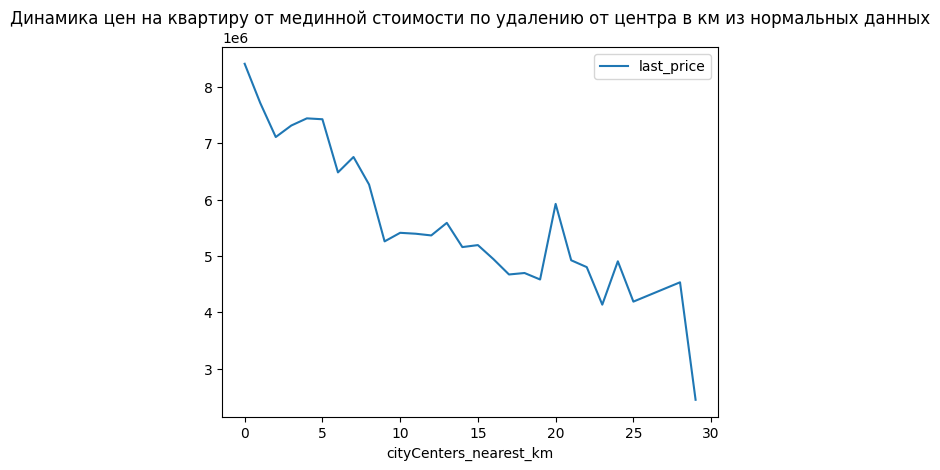

In [154]:
spb_data.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean').plot(style='-',\
title='Динамика цен на квартиру от мединной стоимости по удалению от центра в км из исходных данных')

spb_normal_data.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc='mean').plot(style='-',\
title='Динамика цен на квартиру от мединной стоимости по удалению от центра в км из нормальных данных')

<Axes: title={'center': 'Цена за м² квартиры в растонии от цента в м, по нормальным данным'}, xlabel='cityCenters_nearest'>

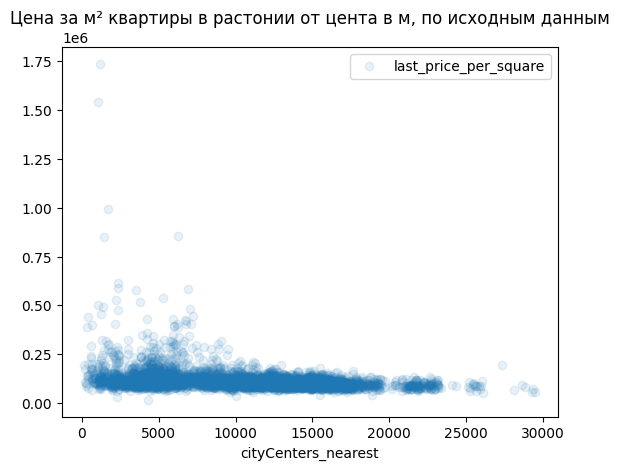

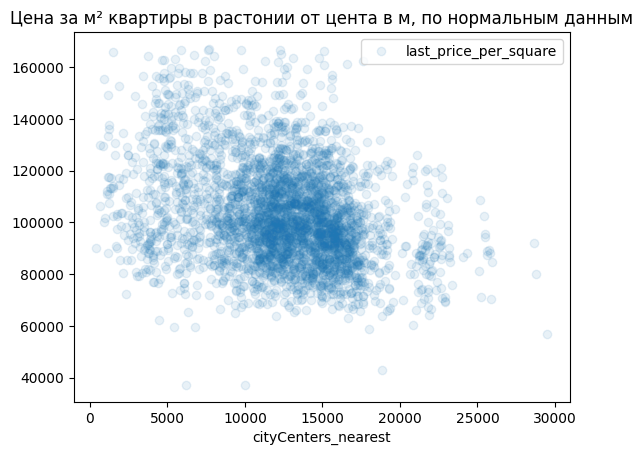

In [155]:
spb_data.pivot_table(index='cityCenters_nearest', values='last_price_per_square', aggfunc='mean').plot(style='o',alpha=0.1,\
title='Цена за м² квартиры в растонии от цента в м, по исходным данным')

spb_normal_data.pivot_table(index='cityCenters_nearest', values='last_price_per_square', aggfunc='mean').plot(style='o',alpha=0.1,\
title='Цена за м² квартиры в растонии от цента в м, по нормальным данным')

<Axes: title={'center': 'Динамика цен за м² квартиры по удалению от центра в км из нормальных данных'}, xlabel='cityCenters_nearest_km'>

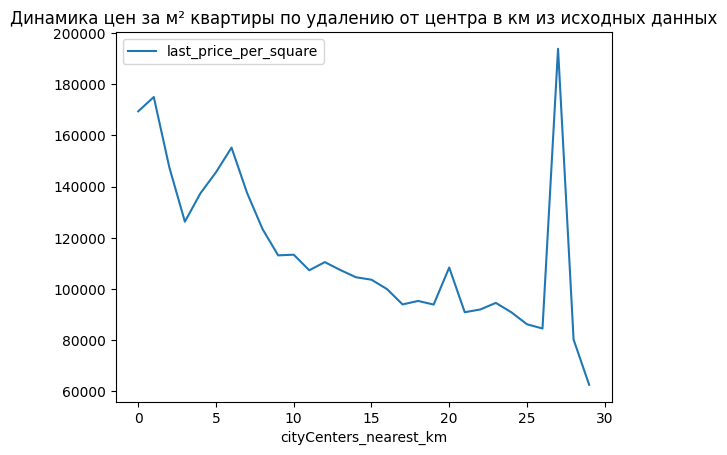

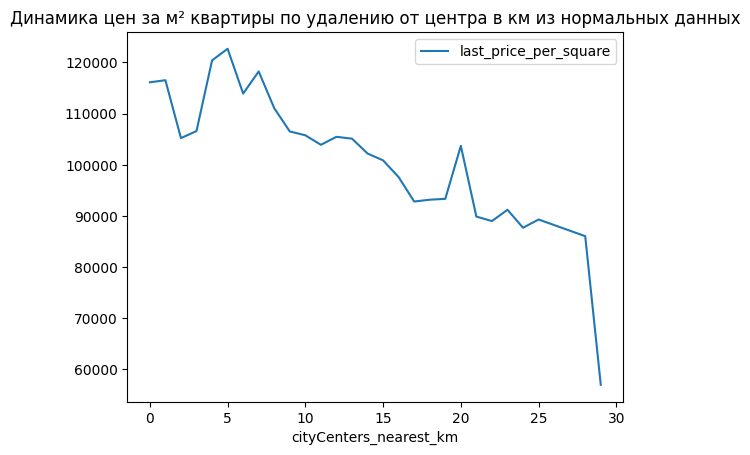

In [156]:
spb_data.pivot_table(index='cityCenters_nearest_km', values='last_price_per_square', aggfunc='mean').plot(style='-',\
title='Динамика цен за м² квартиры по удалению от центра в км из исходных данных')

spb_normal_data.pivot_table(index='cityCenters_nearest_km', values='last_price_per_square', aggfunc='mean').plot(style='-',\
title='Динамика цен за м² квартиры по удалению от центра в км из нормальных данных')

In [157]:
pd.concat([spb_normal_data.pivot_table(index='cityCenters_nearest_km', values='last_price_per_square', aggfunc='mean'),
                            spb_data.pivot_table(index='cityCenters_nearest_km', values='last_price_per_square', aggfunc='mean')],
                            axis=1, keys=['Нормальные данные', 'Исходные данные']).round(2)

,Нормальные данные,Исходные данные
,last_price_per_square,last_price_per_square
cityCenters_nearest_km,,
0.0,116101.97,169455.67
1.0,116506.05,175052.23
2.0,105195.01,147539.81
3.0,106572.53,126286.16
4.0,120386.18,137389.13
5.0,122653.52,145605.75
6.0,113900.14,155259.73
7.0,118223.21,137531.34


In [158]:
print(f'''Корреляция между стоимостью квартиры и ее удалением от центра по исходым данным: \
{float(round(spb_data['last_price_per_square'].corr(spb_data['cityCenters_nearest_km']),2))}''')
print(f'''Корреляция между стоимостью квартиры и ее удалением от центра по нормальным данным: \
{float(round(spb_normal_data['last_price_per_square'].corr(spb_normal_data['cityCenters_nearest_km']),2))}''')

Корреляция между стоимостью квартиры и ее удалением от центра по исходым данным: -0.31
Корреляция между стоимостью квартиры и ее удалением от центра по нормальным данным: -0.28


<div style="font-size: 16px;text-align: center; font-weight: bold; background-color: #9ACD32;">
<hr height="2px" color="#800080">
Для изучения влияния отдаленности жилого помещения от центра города Санкт-Петербург, я создала отдельную таблицу где хранятся обхявления только по этому городу. После чего построив диаграммы рассеивания зависимости цены на квартиру от ее расстояния была видна небольшая тенденция с увеличением цены с уменьшением расстояния, НО я считаю что это не совсем верное решение. Так как на цену квартиры влияяет не только ее расположение, но и не маловажный фактор общей площади. Поэтому я решила проводить анализ по средней стоимости за м². Графически видно, что с увеличение отдаленности от центра, падает стоимость за редкими исключениями. Также расчитав корреляцию я могу сказать что присущая тенденция уменьшения цены с увеличением расстояния имеет относительно сильную взаимосвязь
<hr height="2px" color="#800080">
</div>

### Напишите общий вывод

По итогам анализа объявления о продаже жилплощади в период с 2014 по 2019 год, после изучения маткриалов, их предобработки, заполнения пропусков, избавления от аномальных значений, приведения данных в целом в нормальное состояния при котором их можно обрабатывать. Я могу сделать вывод о том что:
* С увеличением площади растет и цена за квартиру в целом, в то время как цена за м² слабо изменяется
* Самые дорогие квартиры в расчете цена/метраж являются однокомнатые
* Никто не любит жить на первых этажах, поэтому цена на них сравнительно с другими меньше
* Мало кому нравится высота, так что на последних этажах квартиры тоже относиттельно не дорогие, но в среднем на 10% дороже чем на первых
* Чем ближе квартира к центру города тем она дороже, но при это цены могут колебаться первые 10 км, да и самые дорогие квартиры находятся не в самом центре, а не много в отдалении от него, смею предположить что это связанно с тем, что центр города - обычно туристическое место с кучей народа, из-за чего немного снижают цену
* Самые популярыне квартиры имеют до 3 комнат с общей площадью до 110 м²
* Многие объявления были скорее всего сняты в автоматичком режиме
* Есть зависимость цены от дня недели и месяца
* При расссмотрении цен в зависимости от года можно наблюдать резкое падение цен и их постепенный рост, считаю что это может быть связанно с экономической и политической ситуацией
Подводя итог анализа я могу сказать, что лучше продавать однокомнатную квартиру или квартиру с открытой планировкой до 110 м² в январский понедельник, примерно в 3-10 км от центра города и чтобы она находилась не на крайних этажах, в таком случае цена будет максимальной. Покупать же квартиру совету в июньскую пятницу, по поводу этажа, планировки, метража и расстояния от центра будет делом вкуса и препочтений и бюджета каждогою

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.